In [2]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
import pickle
import joblib

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

from rich.progress import track

from termcolor import colored

from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

print(tf.__version__)

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2.10.0
2023-05-31 15:09:48
15:09:48


In [3]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

worker_give_metrics write_to_csv_time     time  response_time_p95  \
0         192.168.0.6          06:53:22  06:53:2           64.54160   
1         192.168.0.6          06:53:30  06:53:3           51.54765   
2         192.168.0.6          06:53:40  06:53:4           42.32600   
3         192.168.0.6          06:53:50  06:53:5           26.38870   
4         192.168.0.6          06:54:00  06:54:0           55.03840   

   response_time  worker_number  request_rate  CPU0User%  CPU0Idle%  \
0      34.848263              1           1.9        9.2       82.3   
1      23.909114              1           8.8       15.0       74.5   
2      23.453980              3          10.1        9.5       88.0   
3      20.319485              2           9.9       13.3       84.4   
4      32.386930              4          10.0       10.0       87.0   

   CPU0Total%  ...  [NUMA:0]Mapped  [NUMA:0]Anon  [NUMA:0]AnonH  \
0        12.4  ...        105389.6      975785.2         2048.0   
1        19.7  ...        105396.0      978940.0         2048.0   
2        11.8  ...        104144.0      976289.6         2048.0   
3        15.5  ...        104156.0      975278.4         2048.0   
4        12.7  ...        104168.0      975758.4         2048.0   

   [NUMA:0]Inactive  [NUMA:0]Hits  [TCPD]InReceives  [TCPD]InDelivers  \
0          345929.2         100.0              20.9              20.9   
1          347234.0         100.0              53.6              53.6   
2          342557.6         100.0              26.1              26.1   
3          342531.6         100.0              30.6              30.6   
4          342485.6         100.0              17.5              17.5   

   [TCPD]OutRequests  [TCPD]InSegs  [TCPD]OutSegs  
0               20.2          20.9           20.2  
1               52.2          53.6           52.3  
2               25.4          25.6           25.0  
3               29.6          30.6           29.7  
4               17.4          17.5           17.5  

[5 rows x 36 columns]

In [4]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    _ = df.describe().T
    display(_)

count       mean     std        min        25%        50%  \
response_time_p95 200.00     657.90 2324.26      14.91      34.87      78.37   
response_time     200.00     470.78 1844.46      11.85      24.47      52.83   
worker_number     200.00       4.99    2.53       1.00       3.00       5.00   
request_rate      200.00       9.57    1.49       1.20       9.90      10.00   
CPU0User%         200.00      27.51   26.53       4.00       9.28      15.15   
CPU0Idle%         200.00      70.19   26.42       0.00      60.20      81.90   
CPU0Total%        200.00      29.52   26.52       5.70      11.17      18.00   
[DSK:sda]Reads    200.00       0.37    3.41       0.00       0.00       0.00   
[DSK:sda]RMerge   200.00       0.00    0.00       0.00       0.00       0.00   
[DSK:sda]RKBytes  200.00       6.35   62.06       0.00       0.00       0.00   
[DSK:sda]WaitR    200.00       0.03    0.10       0.00       0.00       0.00   
[DSK:sda]Writes   200.00       7.91    8.88       0.30       0.70       2.95   
[DSK:sda]WMerge   200.00       2.75    0.94       0.50       2.20       2.50   
[DSK:sda]WKBytes  200.00      49.77   42.57       8.00      15.60      29.05   
[DSK:sda]WaitW    200.00       0.92    0.52       0.30       0.70       0.90   
[DSK:sda]Request  200.00       7.10    2.01       1.60       5.70       7.25   
[DSK:sda]QueLen   200.00       0.11    0.09       0.00       0.10       0.10   
[DSK:sda]Wait     200.00       0.94    0.52       0.30       0.70       0.90   
[DSK:sda]SvcTim   200.00       1.62    0.70       0.40       1.20       1.60   
[DSK:sda]Util     200.00       0.54    1.01       0.10       0.30       0.40   
[NUMA:0]Used      200.00 1853359.10 5708.24 1835507.20 1848742.10 1852802.00   
[NUMA:0]Free      200.00  182008.90 5708.24  163545.20  177055.80  182566.00   
[NUMA:0]Slab      200.00  145643.01 1690.59  142265.60  144105.00  145484.60   
[NUMA:0]Mapped    200.00  105485.25  764.18  104144.00  104913.50  105452.00   
[NUMA:0]Anon      200.00  978840.52 2302.75  975278.40  977423.60  978010.80   
[NUMA:0]AnonH     200.00    2048.00    0.00    2048.00    2048.00    2048.00   
[NUMA:0]Inactive  200.00  343296.81  629.84  342386.80  342840.60  343243.20   
[NUMA:0]Hits      200.00     100.00    0.00     100.00     100.00     100.00   
[TCPD]InReceives  200.00      20.37   13.70       7.80      11.00      15.00   
[TCPD]InDelivers  200.00      20.37   13.70       7.80      11.00      15.00   
[TCPD]OutRequests 200.00      20.06   13.53       7.90      10.78      14.40   
[TCPD]InSegs      200.00      20.29   13.69       7.80      10.80      15.00   
[TCPD]OutSegs     200.00      20.06   13.52       7.90      10.78      14.50   

                         75%        max  
response_time_p95     225.73   17740.25  
response_time         164.10   16587.03  
worker_number           8.00       8.00  
request_rate           10.00      10.10  
CPU0User%              38.15      98.30  
CPU0Idle%              88.33      94.20  
CPU0Total%             39.62     100.00  
[DSK:sda]Reads          0.00      36.30  
[DSK:sda]RMerge         0.00       0.00  
[DSK:sda]RKBytes        0.00     676.30  
[DSK:sda]WaitR          0.00       0.60  
[DSK:sda]Writes        15.30      32.80  
[DSK:sda]WMerge         3.00       5.70  
[DSK:sda]WKBytes       80.82     180.50  
[DSK:sda]WaitW          1.00       6.60  
[DSK:sda]Request        8.50      11.80  
[DSK:sda]QueLen         0.20       0.70  
[DSK:sda]Wait           1.10       6.60  
[DSK:sda]SvcTim         2.00       7.40  
[DSK:sda]Util           0.50      10.50  
[NUMA:0]Used      1858312.20 1871822.80  
[NUMA:0]Free       186625.90  199860.80  
[NUMA:0]Slab       147069.20  148756.00  
[NUMA:0]Mapped     105996.10  108636.40  
[NUMA:0]Anon       980402.00  990625.20  
[NUMA:0]AnonH        2048.00    2048.00  
[NUMA:0]Inactive   343717.90  347234.00  
[NUMA:0]Hits          100.00     100.00  
[TCPD]InReceives       23.77      65.00  
[TCPD]InDelivers       23.77      65.0

In [5]:
df['worker_give_metrics'].unique()

array(['192.168.0.6'], dtype=object)

## A request_rate, worker_number és a response_time érdkel csak

Mert arra vagyok kíváncsi, hogy csak a 'request_rate' és a 'worker_number' segítségével meg lehet-e pontosan becsülni a válaszidőt (response_time)

Erre olyan Mérési teszteket csináltam ahol

1. A bejövő kérések számát változtattam a teszt során (és az API paramétereket nem)
2. A bejövő kérések száma változatlan volt (konstans) és az API paramétereket változtattam

Továbbá megviszgálok több ML modelt is (LR, LR(interakcióval), NN(bonyolult), NN(egyszerű)

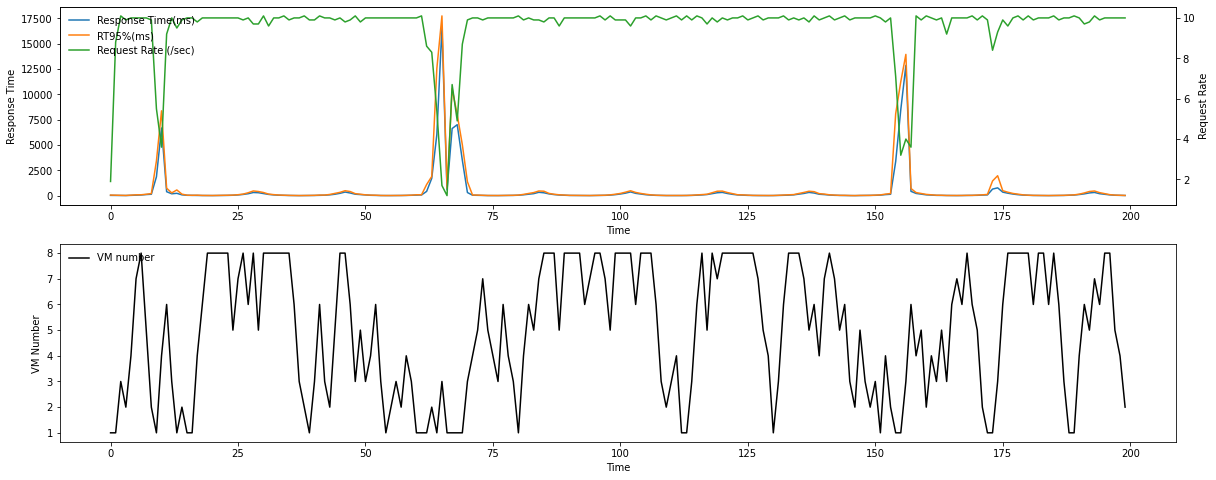

In [6]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')

ax2 = ax1.twinx()

l3 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.legend(loc=2, frameon=False)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2, frameon=False)

plt.show()

## Arra vagyok kíváncsi, hogy

Csupán a bejövő kérések száma és a vm-ek száma alapján meg lehet-e tanítani a neurális hálót,
hogy mi lesz a várható válaszidő.


In [7]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

In [8]:
def plot_true_vs_pred(true, pred):
    plt.axes(aspect='equal')
    plt.scatter(true, pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

# plot_true_vs_pred(f3['CPU0User%'], pred_cpu)

# --

def plot_true_vs_pred_two(true1, pred1, true2, pred2):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.0*2, 4.0))
    
    ax0.axis('equal')
    ax0.set_aspect('equal', 'box')
    ax0.scatter(true1, pred1)
    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax0.set_xlim(lims)
    ax0.set_ylim(lims)
    _ = ax0.plot(lims, lims)
    
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.scatter(true2, pred2)
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _ = ax1.plot(lims, lims)
    
    plt.show()

# plot_true_vs_pred_two(f3['CPU0User%'], pred_cpu, f3['CPU0User%Next'], pred_cpu)

# --

def plot_true_vs_pred_hist(true, pred):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    binwidth = 3.00
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    plt.show()

# plot_true_vs_pred_hist(f3['CPU0User%'].values, pred_cpu)

# plot_true_vs_pred_hist(f3['CPU0User%Next'].values, pred_cpu)

In [9]:
import scipy.stats as stats

def calc_true_pred_stats(true, pred, show=True):
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    if show == True:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if show == True:
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))
    
    return {'slope': slope, 'intercept': intercept, 'r2': r2, 'r': r, 'mse': mse}

In [10]:
import scipy.stats as stats

def plot_true_vs_pred_hist_conf(true, pred, binwidth=3.00, save='true_vs_pred_rt'):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    # binwidth = 3.00
    binwidth = binwidth
    
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    
    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    
    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    # ax_histx.axis('off')
    # ax_histy.axis('off')
    
    # ---------------------------------------------------------------
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    print('r2 {:.2f}'.format(r2))
    print('r  {:.2f}'.format(r))
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    print('mse {:.2f}'.format(mse))
    
    # to plot the adjusted model
    true_line = np.linspace(np.min(true), np.max(true), 100)
    true_line = np.linspace(min(np.min(true),np.min(pred)), max(np.max(true),np.max(pred)), 100)
    
    pred_line = np.polyval([slope, intercept], true_line)
    
    # confidence interval
    ci = t * std_error * (1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5
    # predicting interval
    pi = t * std_error * (1 + 1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5  

    ax_scatter.plot(true_line, pred_line)
    ax_scatter.fill_between(true_line, pred_line + pi, pred_line - pi, color = 'lightcyan', label = '95% prediction interval')
    ax_scatter.fill_between(true_line, pred_line + ci, pred_line - ci, color = 'skyblue', label = '95% confidence interval')

    # the scatter plot (again):
    ax_scatter.scatter(true, pred)
    
    # rounding and position must be changed for each case and preference
    a = str(np.round(intercept))
    b = str(np.round(slope,2))
    r2s = str(np.round(r2,2))
    MSEs = str(np.round(mse))
    
    # ax_scatter.text(20, 64, 'y = ' + a + ' + ' + b + ' x')
    # ax_scatter.text(20, 60, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)
    
    # ax_scatter.legend(fontsize=12)
    ax_scatter.legend(frameon=False)
    
    
    # a belső (pici) 95% Confidence region
    # a külső (nagy) 95% Confidence interval
    
    plt.savefig(save + '.png')
    plt.show()


In [11]:
def plot_pred(pred_rt, legend_position='best'):
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')
    l3 = ax1.plot(pred_rt, color = 'C10', ls = '--', label='Pred RT(ms)')

    ax2 = ax1.twinx()

    l4 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=legend_position, frameon=False)

    plt.show()

# --

def plot_pred_with_res(train_labels, pred_rt):
    'https://www.geeksforgeeks.org/how-to-create-different-subplot-sizes-in-matplotlib'
    fig, (ax1, ax0, ax3) = plt.subplots(3, 1, figsize=(20, 8), gridspec_kw={'height_ratios': [3, 1, 1]})

    l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')
    l3 = ax1.plot(pred_rt, color = 'C10', ls = '--', label='Pred RT(ms)')

    ax2 = ax1.twinx()

    l4 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    _residuals = train_labels - pred_rt
    ax0.plot(_residuals, color = 'C0', label='Residuals')
    ax0.set_ylabel('Residuals')
    
    ax3.plot(df['worker_number'], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

# --

def plot_pred_short(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(df['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

# --

def plot_pred_journal(pred_rt, legend_position=2):
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')
    l3 = ax1.plot(pred_rt, color = 'C10', ls = '--', label='Pred RT(ms)')

    ax2 = ax1.twinx()

    l4 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=0, frameon=False)

    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    # ax2.legend(lns, labs, loc=legend_position, frameon=False, mode='expand', ncol=len(df.columns))
    ax2.legend(lns, labs, loc=legend_position, frameon=False, ncol=4, bbox_to_anchor=(0.12, 0., 0.5, 0.88))
    

    plt.show()

# --

def plot_pred_with_res_journal(train_labels, pred_rt):
    'https://www.geeksforgeeks.org/how-to-create-different-subplot-sizes-in-matplotlib'
    fig, (ax1, ax0, ax3) = plt.subplots(3, 1, figsize=(20, 8), gridspec_kw={'height_ratios': [3, 1, 1]})

    l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')
    # l3 = ax1.plot(pred_rt, color = 'C10', ls = '--', label='Pred RT(ms)')
    l3 = ax1.plot(pred_rt, color = 'black', ls = '--', label='Pred RT(ms)')
    

    ax2 = ax1.twinx()

    l4 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (n/sec)')

    # ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time (ms)')
    ax2.set_ylabel('Request Rate (n/sec)')

    _residuals = train_labels - pred_rt
    ax0.plot(_residuals, color = 'C0', label='Residuals')
    ax0.set_ylabel('Residuals')
    
    ax3.plot(df['worker_number'], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.set_ylim((0,9))
    ax3.legend(loc=0, frameon=False)

    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False, ncol=4, bbox_to_anchor=(0.12, 0., 0.5, 0.88))

    plt.show()


# Oké tehát itt jön ami érdekel

----

## Első körben

## Lináris regresszió RT ~ RR

Meg lehet-e becsülni a válaszidőt csupán a bejövö kérések számával?

**Spoiler:** Nem

(200, 1)
score  = 0.5307382199876605
coef   = [-903.59113785]
intcpt = 9116.344311840885
slope 0.53 int 220.92
r2 0.53
r  0.73
mse 1588457.67


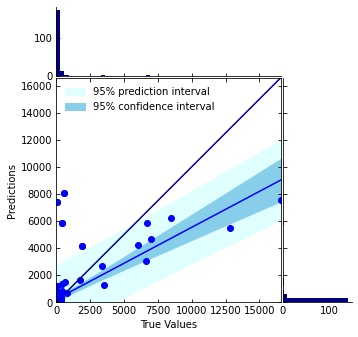

In [12]:
lr = LinearRegression(fit_intercept=True)

inputs = df[['request_rate']]
output = df['response_time']

print(inputs.shape)

rr = lr.fit(inputs, output)
fit_score = rr.score(inputs, output)
fit_coef_ = rr.coef_
fit_intercept_ = rr.intercept_

print('score  =', fit_score)
print('coef   =', fit_coef_)
print('intcpt =', fit_intercept_)

pred_rt = rr.predict(inputs)

plot_true_vs_pred_hist_conf(output, pred_rt, 300)

## Második körben

## Lineáris regresszió RT ~ Worker Number

Meg lehet-e becsülni a várható válaszidőt csupán a bekapcsolt workerek számával?

**Spoiler:** Nem

(200, 1)
score  = 0.05132615500768356
coef   = [-165.41167269]
intcpt = 1296.188551581196
slope 0.05 int 446.62
r2 0.05
r  0.23
mse 3211274.19


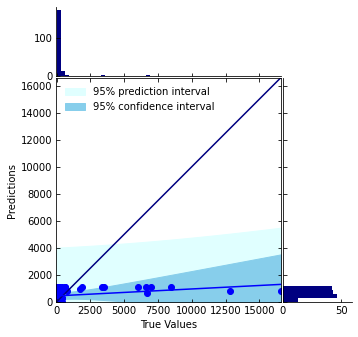

In [13]:
lr = LinearRegression(fit_intercept=True)

inputs = df[['worker_number']]
output = df['response_time']

print(inputs.shape)

rr = lr.fit(inputs, output)
fit_score = rr.score(inputs, output)
fit_coef_ = rr.coef_
fit_intercept_ = rr.intercept_

print('score  =', fit_score)
print('coef   =', fit_coef_)
print('intcpt =', fit_intercept_)

pred_rt = rr.predict(inputs)

plot_true_vs_pred_hist_conf(output, pred_rt, 300)

## Harmadik körben

## Lineáris regresszió RT ~ RR + Worker Number

Meg lehet-e becsülni a várható válaszidőt a bejövő kérések számával és a bekapcsolt workerek számával?

**Spoiler:** Nem

(200, 2)
score  = 0.5307514033989537
coef   = [-902.14243018   -2.78479715]
intcpt = 9116.379214573775
slope 0.53 int 220.91
r2 0.53
r  0.73
mse 1588413.04


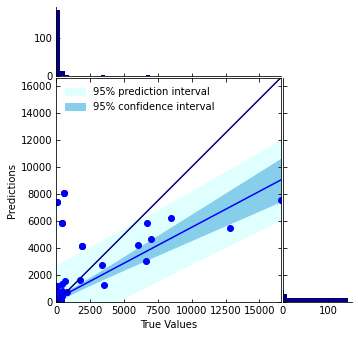

In [14]:
lr = LinearRegression(fit_intercept=True)

inputs = df[['request_rate', 'worker_number']]
output = df['response_time']

print(inputs.shape)

rr = lr.fit(inputs, output)
fit_score = rr.score(inputs, output)
fit_coef_ = rr.coef_
fit_intercept_ = rr.intercept_

print('score  =', fit_score)
print('coef   =', fit_coef_)
print('intcpt =', fit_intercept_)

pred_rt = rr.predict(inputs)

plot_true_vs_pred_hist_conf(output, pred_rt, 300)

## Harmadik és 1/2 körben

## Lineáris regresszió RT ~ RR + Worker Number + (RR \* WM)

Meg lehet-e becsülni a várható válaszidőt a bejövő kérések számával és a bekapcsolt workerek számával?

**Spoiler:** Nem

(200, 3)
score  = 0.5373447132121891
coef   = [-763.16465624  596.2902533   -61.29227472]
intcpt = 7793.773390500253
slope 0.54 int 217.81
r2 0.54
r  0.73
mse 1566094.60


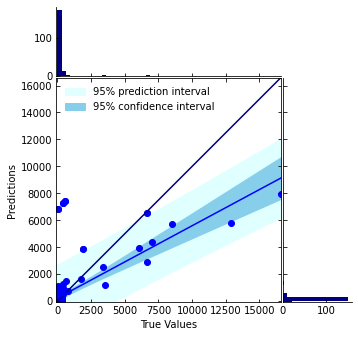

In [15]:
df['rr_wn'] = df['request_rate'] * df['worker_number']

lr = LinearRegression(fit_intercept=True)

inputs = df[['request_rate', 'worker_number', 'rr_wn']]
output = df['response_time']

print(inputs.shape)

rr = lr.fit(inputs, output)
fit_score = rr.score(inputs, output)
fit_coef_ = rr.coef_
fit_intercept_ = rr.intercept_

print('score  =', fit_score)
print('coef   =', fit_coef_)
print('intcpt =', fit_intercept_)

pred_rt = rr.predict(inputs)

plot_true_vs_pred_hist_conf(output, pred_rt, 300)

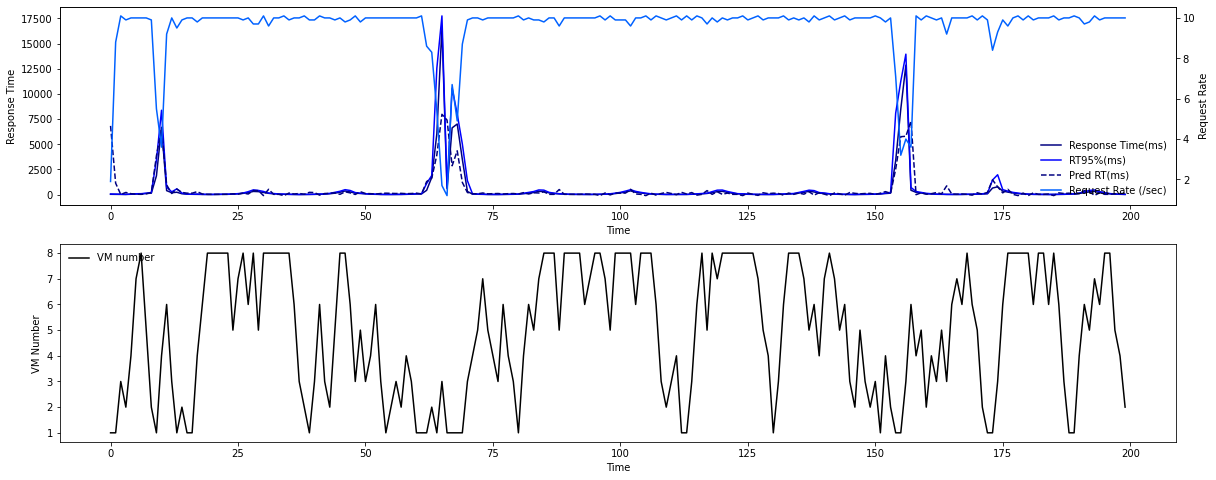

In [16]:
plot_pred(pred_rt)

# Hála istennek - Na azért nem teljesen

Van olyan Test esetem (Test15) ahol a bejövő kérések számával és a workerek számával nem lehet jól megmondani, hogy mi lesz a válaszidő, de ebben a péládában egész jól közelíti (nem mondom, hogy tökéletesen de az r2=0.77 az nem annyira rossz.

### Azért ezt a még a stat modellel is leelenőrzöm

In [17]:
inputs = df[['request_rate', 'worker_number']]
output = df['response_time']

<class 'pandas.core.frame.DataFrame'> (200, 3)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     111.4
Date:                Wed, 31 May 2023   Prob (F-statistic):           4.30e-33
Time:                        15:12:30   Log-Likelihood:                -1711.6
No. Observations:                 200   AIC:                             3429.
Df Residuals:                     197   BIC:                             3439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--

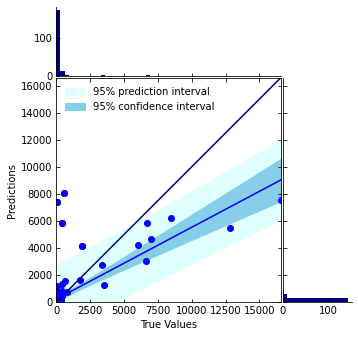

In [18]:
import statsmodels.api as sm

_x = sm.add_constant(inputs)

print(type(_x), _x.shape)

model = sm.OLS(output, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
pred_rt_sm = results.fittedvalues
pred_rt_sm = results.predict(_x)
print('------------------------------------------------------------------------------')

plot_true_vs_pred_hist_conf(output, pred_rt_sm, 300)

## Az sm-mel kapott eredmények ugyan ezt erősítik meg.

Nem lehet jól de még csak közelítőleg jól sem becsülni a válaszidőt a bejövő kérések száma,
a workerek száma és a kettő közötti interakció alapján sem.

Azért az felmerült még bennem, hogy mi lenne ha magasabb order is lenne.

<class 'pandas.core.frame.DataFrame'> (200, 7)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 31 May 2023   Prob (F-statistic):           3.55e-60
Time:                        15:12:32   Log-Likelihood:                -1637.2
No. Observations:                 200   AIC:                             3288.
Df Residuals:                     193   BIC:                             3311.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--

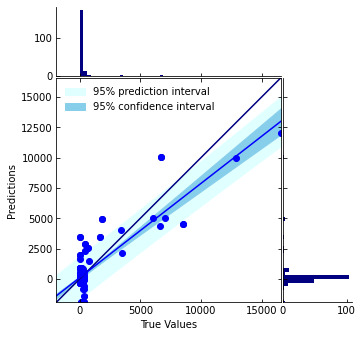

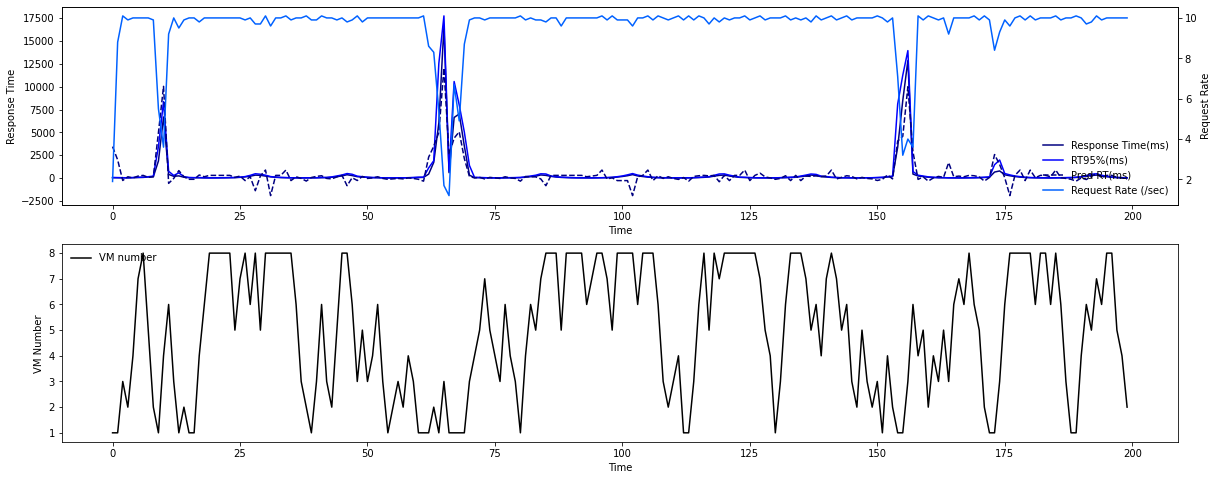

In [19]:
df['rr_wn'] = df['request_rate'] * df['worker_number']
df['rr2'] = df['request_rate'] * df['request_rate']
df['wm2'] = df['worker_number'] * df['worker_number']
df['rr2_wm2'] = df['rr2'] * df['wm2']

inputs = df[['request_rate', 'worker_number', 'rr_wn', 'rr2', 'wm2', 'rr2_wm2']]
output = df['response_time']

import statsmodels.api as sm

_x = sm.add_constant(inputs)

print(type(_x), _x.shape)

model = sm.OLS(output, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
pred_rt_sm = results.fittedvalues
pred_rt_sm = results.predict(_x)
print('------------------------------------------------------------------------------')

plot_true_vs_pred_hist_conf(output, pred_rt_sm, 300)

plot_pred(pred_rt_sm)

### Sajnos ez már nem annyira rossz,

De jó hír, hogy még ez is használhatatlan. Ezek a t ények mind a neurális háló használata mellett szólnak.

Nézzük magasabb polinomok esetén mi van:

<class 'numpy.ndarray'> (200, 10)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     168.3
Date:                Wed, 31 May 2023   Prob (F-statistic):           3.37e-82
Time:                        15:12:33   Log-Likelihood:                -1578.7
No. Observations:                 200   AIC:                             3175.
Df Residuals:                     191   BIC:                             3205.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

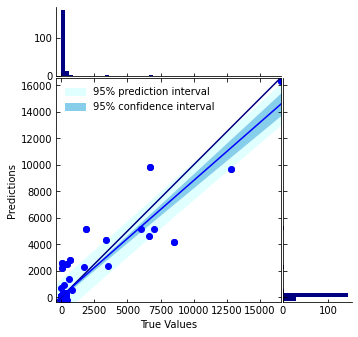

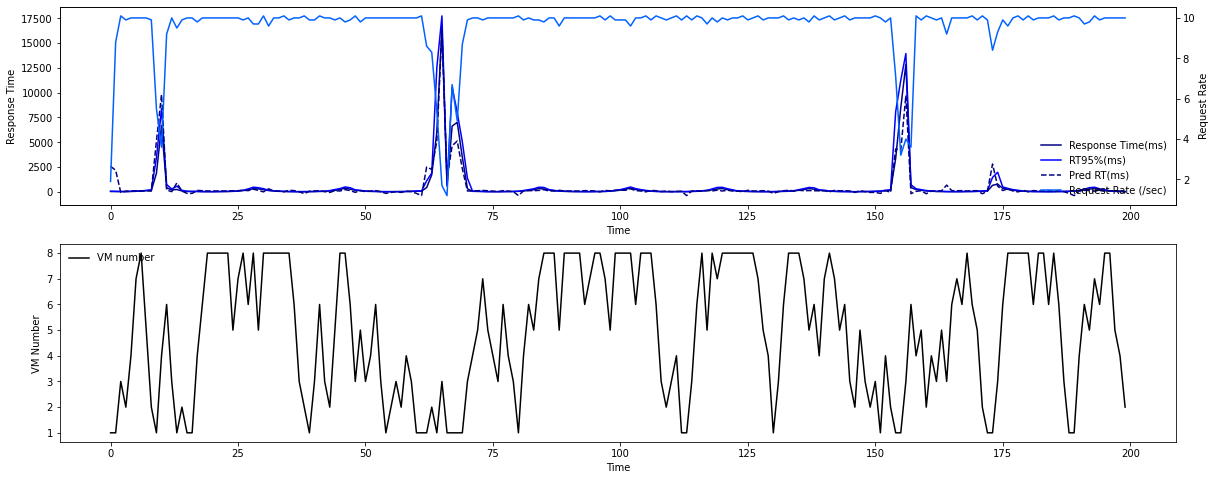

In [20]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)

inputs = df[['request_rate', 'worker_number', 'rr_wn']]
output = df['response_time']

inputs = polynomial_features.fit_transform(inputs)
#print(inputs.shape)
#print(inputs[:1, :])

import statsmodels.api as sm

_x = sm.add_constant(inputs)

_x = inputs

print(type(_x), _x.shape)

model = sm.OLS(output, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
# print(f'\nregression coefficients: {results.params}')    
pred_rt_sm = results.fittedvalues
pred_rt_sm = results.predict(_x)
print('------------------------------------------------------------------------------')

plot_true_vs_pred_hist_conf(output, pred_rt_sm, 300)

plot_pred(pred_rt_sm)

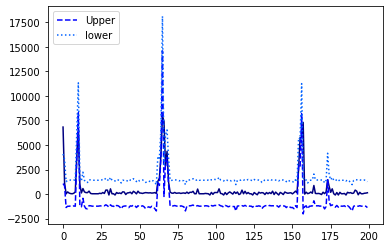

In [21]:
# Ha valaha úgy érezném, hogy a statisztikai modell konfidencia intervallumára lenne szükésegem

from statsmodels.sandbox.regression.predstd import wls_prediction_std

# https://ostwalprasad.github.io/machine-learning/Polynomial-Regression-using-statsmodel.html

_, upper,lower = wls_prediction_std(results)

plt.plot(pred_rt)
plt.plot(upper,'--',label="Upper")
plt.plot(lower,':',label="lower")
plt.legend(loc='upper left')

## Meg kéne nézni úgy is, hogy a vm szám kategóriára van kódolva

In [22]:
# https://notebook.community/datascienceguide/datascienceguide.github.io/tutorials/multiple_regression_in_python

In [23]:
_ = df['worker_number'].unique().size

print(_)

_ = df['worker_number'].unique()

print(_)

8
[1 3 2 4 7 8 5 6]


In [24]:
wm = df['worker_number'].values

In [25]:
# kategórizáció scikit learnnel

import sklearn.preprocessing
a = wm
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
print('{0}'.format(b))
print('{0}'.format(b.shape))

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
(200, 9)


In [26]:
# kategórizáció kerassal

from keras.utils.np_utils import to_categorical   

fos = to_categorical(wm, num_classes=10)

print('{0}'.format(fos))
print('{0}'.format(fos.shape))

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(200, 10)


In [27]:
# hozzá kell még adnom azt a változót amit nem kategorizáltam és elemezni akarom --> request_rate

inputs = np.hstack((df['request_rate'].values.reshape(-1, 1), fos))

print('{0}'.format(inputs.shape))
print('{0}'.format(inputs))

(200, 11)
[[ 1.9  0.   1.  ...  0.   0.   0. ]
 [ 8.8  0.   1.  ...  0.   0.   0. ]
 [10.1  0.   0.  ...  0.   0.   0. ]
 ...
 [10.   0.   0.  ...  0.   0.   0. ]
 [10.   0.   0.  ...  0.   0.   0. ]
 [10.   0.   0.  ...  0.   0.   0. ]]


<class 'numpy.ndarray'> (200, 12)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     29.04
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.55e-29
Time:                        15:13:07   Log-Likelihood:                -1707.7
No. Observations:                 200   AIC:                             3433.
Df Residuals:                     191   BIC:                             3463.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


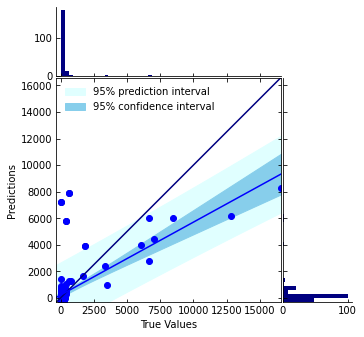

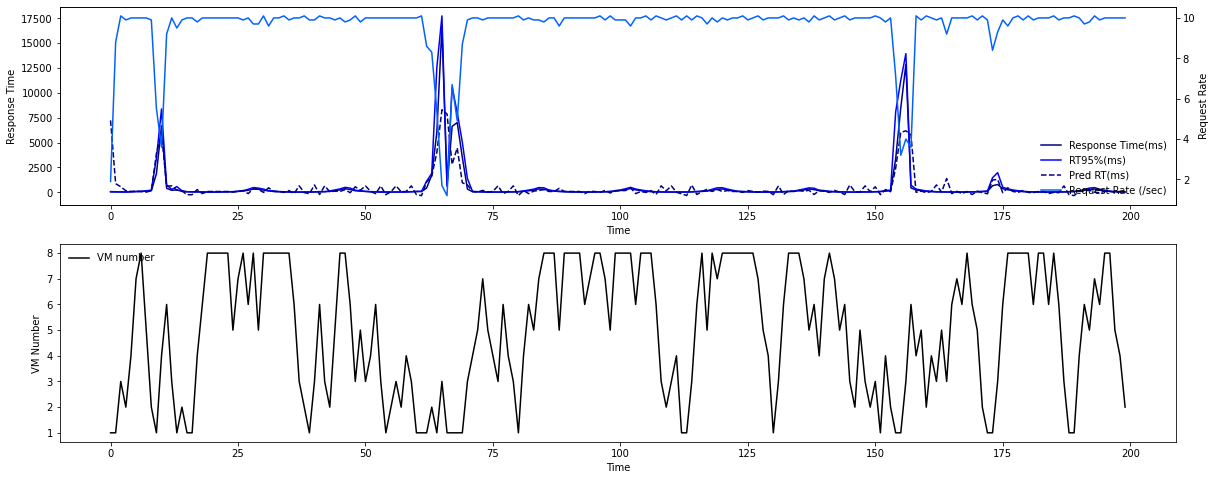

In [28]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=1)



inputs = np.hstack((df['request_rate'].values.reshape(-1, 1), fos))



output = df['response_time']

inputs = polynomial_features.fit_transform(inputs)





import statsmodels.api as sm

_x = sm.add_constant(inputs)

_x = inputs

print(type(_x), _x.shape)

model = sm.OLS(output, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
# print(f'\nregression coefficients: {results.params}')    
pred_rt_sm = results.fittedvalues
pred_rt_sm = results.predict(_x)
print('------------------------------------------------------------------------------')

plot_true_vs_pred_hist_conf(output, pred_rt_sm, 300)

plot_pred(pred_rt_sm)

## Kategóriára kódolva

Kibróbáltam így is (egész magas n=3 polinomokkal is) és így sem ad jó eredményet. (ez megnnyugató)

## Tehát a jó hír

Hogy magasabb polinomok esetében sem képes jó becsést adni.

Tehát a Lineáris regresszió nem állta ki a próbát

## Most ugyan ez neurális hálóval

## NN RT ~ RR + Worker Number (kategorizálva)

Meg lehet-e becsülni a válaszidőt csupán a bejövö kérések számával?

**Spoiler:** Igen, ha elég összetette a Neurális háló (de olyankor bármit)

In [29]:
import tqdm
import tensorflow as tf
import tensorflow_addons as tfa
tf.get_logger().setLevel('INFO')

# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar(leave_epoch_progress=False,
                                              leave_overall_progress=True,
                                              show_epoch_progress=False,
                                              show_overall_progress=True)

/home/ubuntu/notebook/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [30]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
# Ismét 'request_rate' + worker_number ketegóriára kódolva (one-hot módon)

inputs = np.hstack((df['request_rate'].values.reshape(-1, 1), fos))

inputs[0:3, :]

array([[ 1.9,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 8.8,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [10.1,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [32]:
# Most csak arra vagyok kíváncsi, hogy csak a 'request_rate', csak 'worker_number' és a kettő alapján
# képes-e elérni a neurális háló ugyan azt az eredményt amit a fenti metriákkal sikerült neki


# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()


train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

train_labels = df[['response_time']]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())

first_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model.summary()

first_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


2023-05-31 15:13:28.482183: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-31 15:13:28.482285: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-31 15:13:28.482344: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lb): /proc/driver/nvidia/version does not exist
2023-05-31 15:13:28.483249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[9.57 0.   0.13 0.07 0.13 0.08 0.1  0.13 0.06 0.28 0.  ]]
First example: [[1.9 0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]]
Normalized   : [[-5.17  0.    2.53 -0.28 -0.39 -0.3  -0.33 -0.39 -0.26 -0.62  0.  ]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 30)                360       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 864
Trainable params: 841
Non-tra

Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-31 15:14:00.162386: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:14:36.935294: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


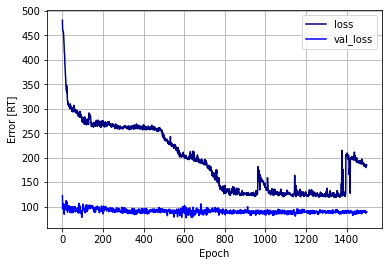

CPU times: user 1min 11s, sys: 2.53 s, total: 1min 13s
Wall time: 1min 22s


In [33]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history)

7/7 [==============================] - 0s 3ms/step


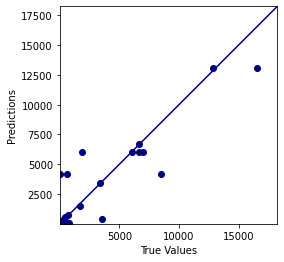

In [34]:
pred_rt_nn = first_model.predict(train_features)

pred_rt_nn = np.squeeze(pred_rt_nn, 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn)

slope 0.85 int 37.88
r2 0.87
r  0.93
mse 456956.40


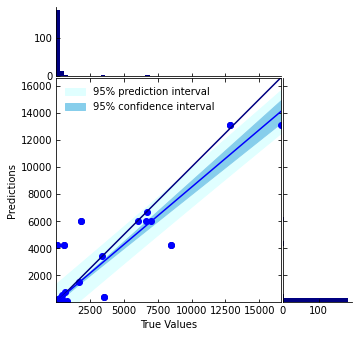

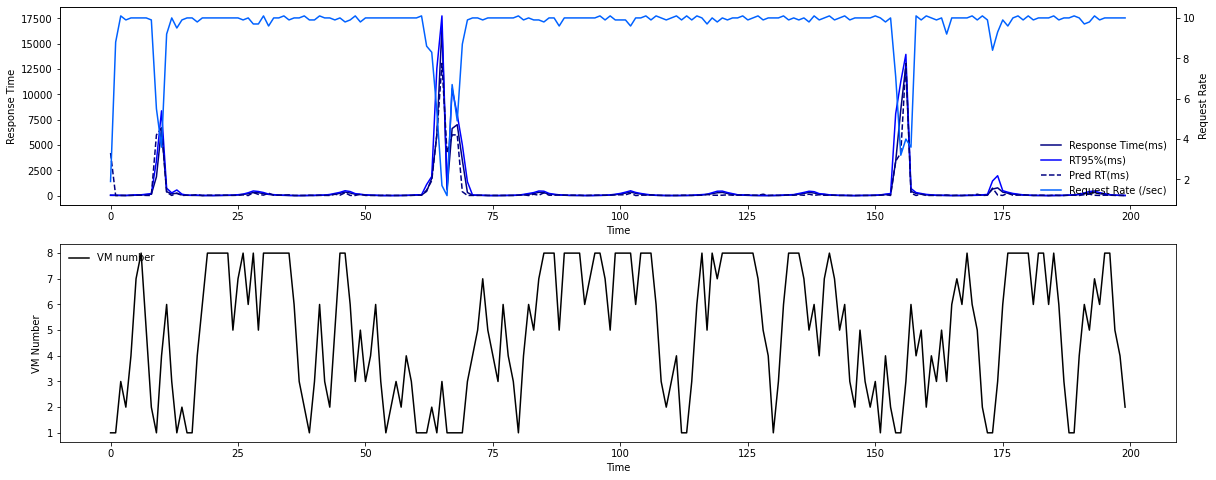

In [35]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn, 300)

plot_pred(pred_rt_nn)

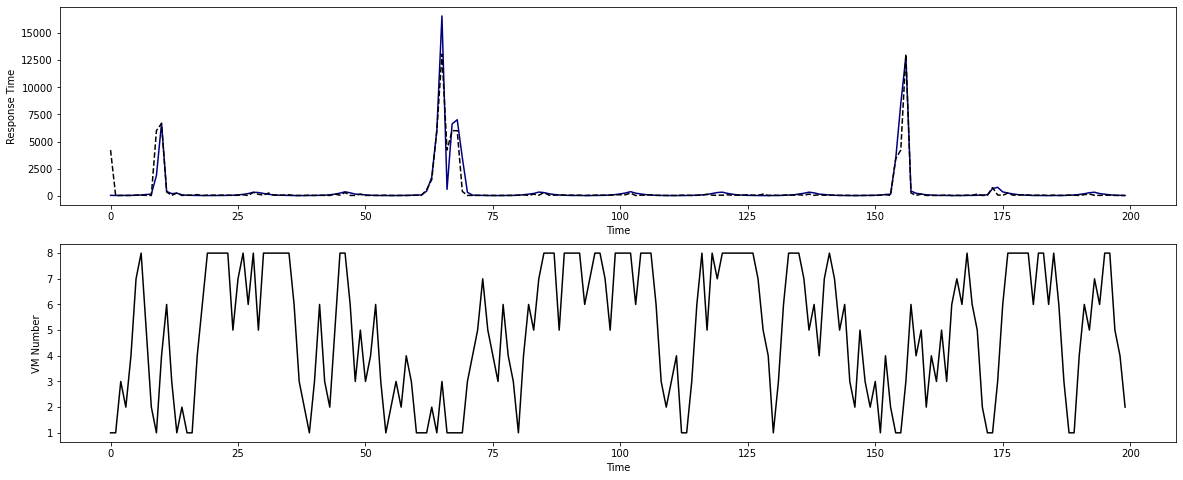

In [36]:
plot_pred_short(train_labels.values, pred_rt_nn)

In [37]:
print('{0}'.format(train_features.shape))
print('{0}'.format(train_features[:3, :]))

(200, 11)
[[ 1.9  0.   1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 8.8  0.   1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [10.1  0.   0.   0.   1.   0.   0.   0.   0.   0.   0. ]]


## Konkluzió

**Ez egy sz@r teszt mérés volt**

Eredetileg azt akartam ebben a Test-ben elérni, hogy a bejövő kérések száma és a válaszidő között ne legyen semmilyen összefüggés. Szemel láthatóen ez nem sikerült.

Nem is foglalkozom a továbbiakban a tesztel.


## Most hogy ez ennyire jó nézzük meg még azt, hogy ...

Csak a bejövő kérsek számának alakulásával nyilván nem lehet megmondani a válaszidőt ez nyilvánvaló, de mi a helyzet a rendszerbe csatolt gépek számával?

1. meg lehet-e becsülni a válaszidőt a kategóriára kódolt gépek számával?

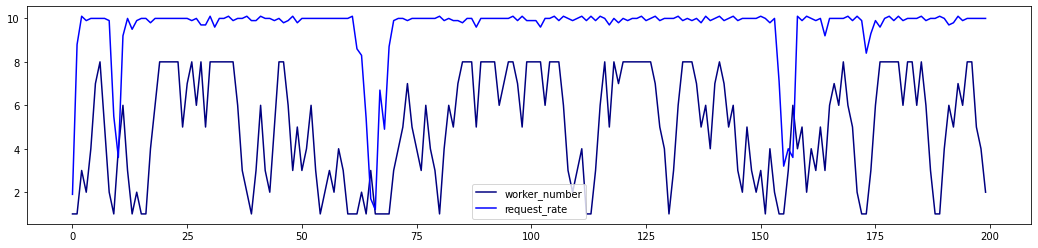

In [38]:
plt.figure(figsize=(18, 4))
plt.plot(df['worker_number'], label='worker_number')
plt.plot(df['request_rate'], label='request_rate')
plt.legend()
plt.show()

## Most jön az amire tényleg nagyon kíváncsi vagyok.

Ez a **Train23** elvileg egy olyan teszt ahol a **'request_rate'** nem változik. **De sajnos ez nem igaz.**

Ebben az esetben **majdnem** sikerült a JMetert úgy beállítanom, hogy tényleg nagyjábol egyenletes volt a terhelés ezált a metric.logger is úgy mérte hogy adott idointervallumokban azonos számú kérés érkezett be, tehát a **'request_rate'** változónak elvileg nem lehet semmilyen hatása a válaszidőre, ugyanakor a grafion alapján is látszik, hogy ez az állítás nem igaz.

## Csak a 'request_rate' alapján becsülni a válaszidőt

-------------------------------
train_feautues.shape (200, 1)
-------------------------------
-------------------------------
[[9.57]]
First example: [[1.9]]
Normalized   : [[-5.17]]
-------------------------------


Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-31 15:18:00.121230: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:18:00.161695: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:19:00.133516: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:19:00.171679: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


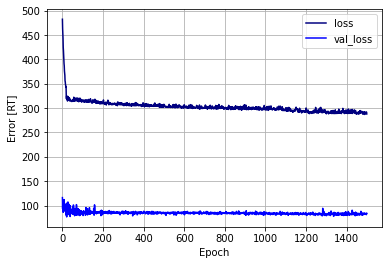

In [39]:



# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()



# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['request_rate']

train_features = df[input_variables]
train_labels = df[['response_time']]

print('-------------------------------')
print('train_feautues.shape', train_features.shape)
print('-------------------------------')

normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_rr = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

# first_model_rr.summary()

first_model_rr.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_rr = first_model_rr.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_rr)

# train_feautues.shape (224, 2)
# -------------------------------
# -------------------------------
# [[15.72 22.25]]
# First example: [[0.4 9.8]]
# Normalized   : [[-1.25 -0.77]]
# -------------------------------

7/7 [==============================] - 0s 2ms/step


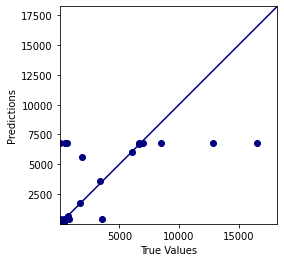

In [40]:
pred_rt_nn_with_rr = first_model_rr.predict(train_features)

pred_rt_nn_with_rr = np.squeeze(pred_rt_nn_with_rr, 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_rr)

slope 0.63 int 167.09
r2 0.58
r  0.76
mse 1429866.90


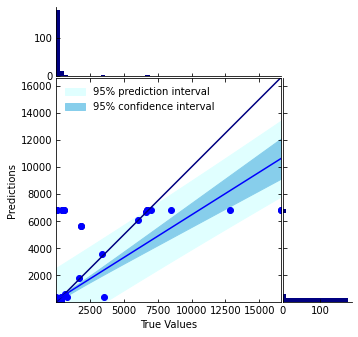

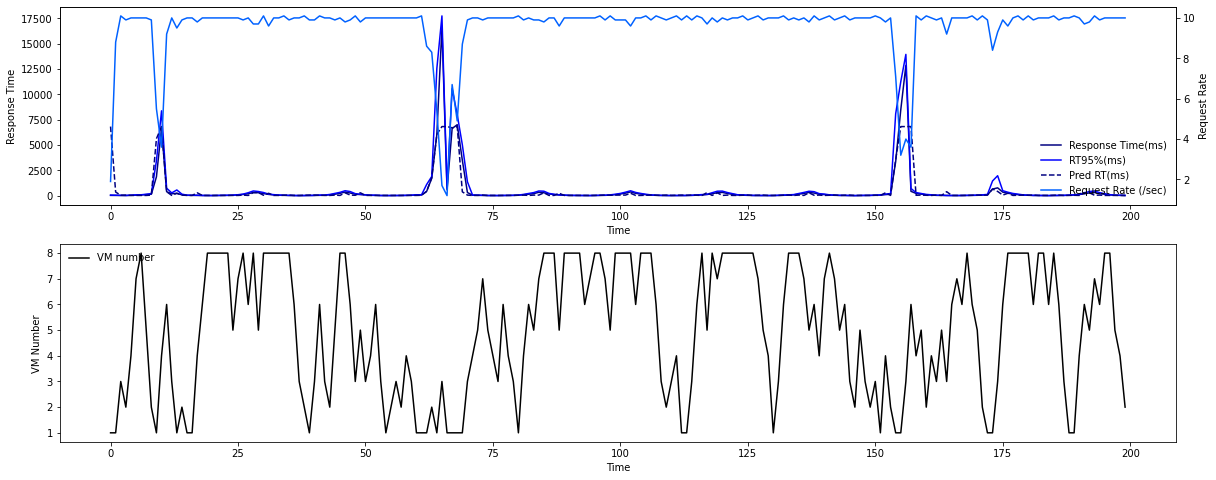

In [41]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_rr, 300)

plot_pred(pred_rt_nn_with_rr)

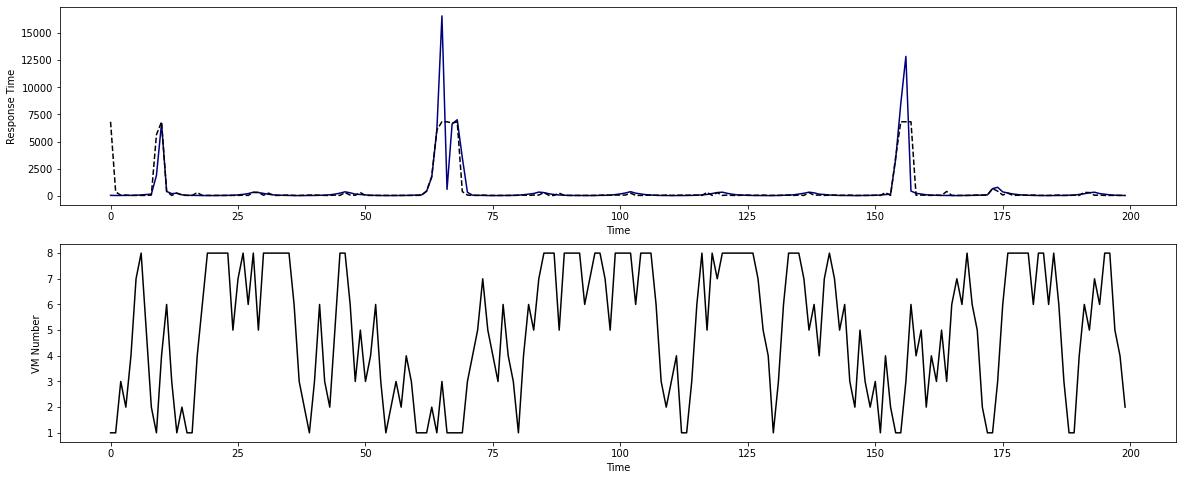

In [42]:
plot_pred_short(train_labels.values, pred_rt_nn_with_rr)

## Mi látszik?

## Pont ezt akartam látni.

Vagyis, hogy van végre egy olyan Test-em amiben az incommint **'request_rate'** semmilyen hatással nincs a válaszidőre - és nem is lehet mert konstans az egész mérés alatt - de mégis sikerült előidéznem azt, hogy a válaszidőben kilengések legyenek és összefüggés legyen a virtuális gépek száma és a válaszidő között.

Mi is történik valójában?

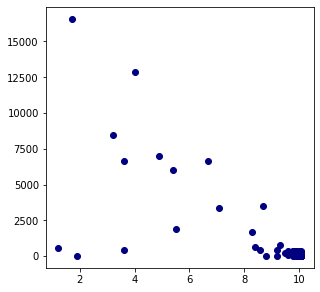

In [43]:
# Plot rr _ vs _ rt

plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['request_rate'], df['response_time'])
plt.show()

# Erre képes voltam találni egy olyan függvényt ami rr -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.

(110,) (110, 1)


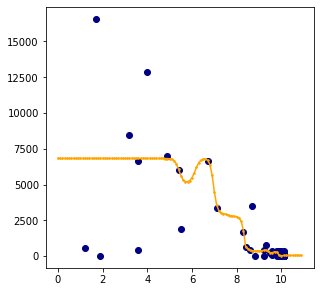

In [44]:
# egy oszlopos inputhoz
_x = np.arange(0, 11, 0.1)
__x = _x.reshape(-1, 1)
print(_x.shape, __x.shape)

# -
_pred_rt_by_x = first_model_rr.predict(__x, verbose = 0)

plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['request_rate'], df['response_time'])
plt.plot(_x, _pred_rt_by_x, color='orange')
plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)
plt.show()

# Erre képes voltam találni egy olyan függvényt ami rr -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.


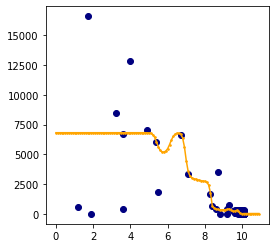

In [45]:
plt.figure(figsize=(4, 4))
plt.scatter(df['request_rate'], df['response_time'])
plt.plot(_x, _pred_rt_by_x, color='orange')
plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)
plt.show()

## Csak a 'worker_number' alapján becsülni a válaszidőt

-------------------------------
train_feautues.shape (200, 1)
-------------------------------
-------------------------------
[[4.99]]
First example: [[1]]
Normalized   : [[-1.58]]
-------------------------------


Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-31 15:20:28.349152: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:21:00.053234: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:21:00.091618: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:21:00.130045: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:21:00.167999: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:21:00.207943: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


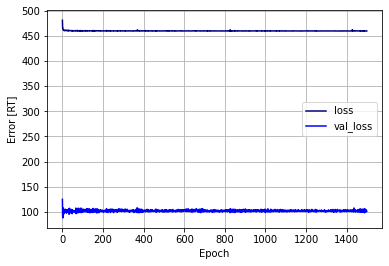

In [46]:



# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()



# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['worker_number']

train_features = df[input_variables]
train_labels = df[['response_time']]

print('-------------------------------')
print('train_feautues.shape', train_features.shape)
print('-------------------------------')

normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_wm = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

# first_model_rr.summary()

first_model_wm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_wm = first_model_wm.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_wm)

# train_feautues.shape (224, 2)
# -------------------------------
# -------------------------------
# [[15.72 22.25]]
# First example: [[0.4 9.8]]
# Normalized   : [[-1.25 -0.77]]
# -------------------------------

7/7 [==============================] - 0s 2ms/step


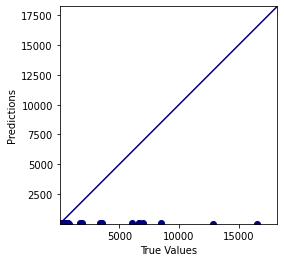

In [47]:
pred_rt_nn_with_wm = first_model_wm.predict(train_features)

pred_rt_nn_with_wm = np.squeeze(pred_rt_nn_with_wm, 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_wm)

slope -0.00 int 56.21
r2 0.01
r  0.08
mse 3562323.85


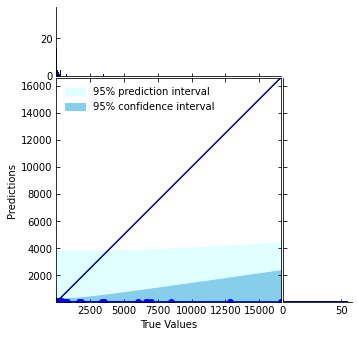

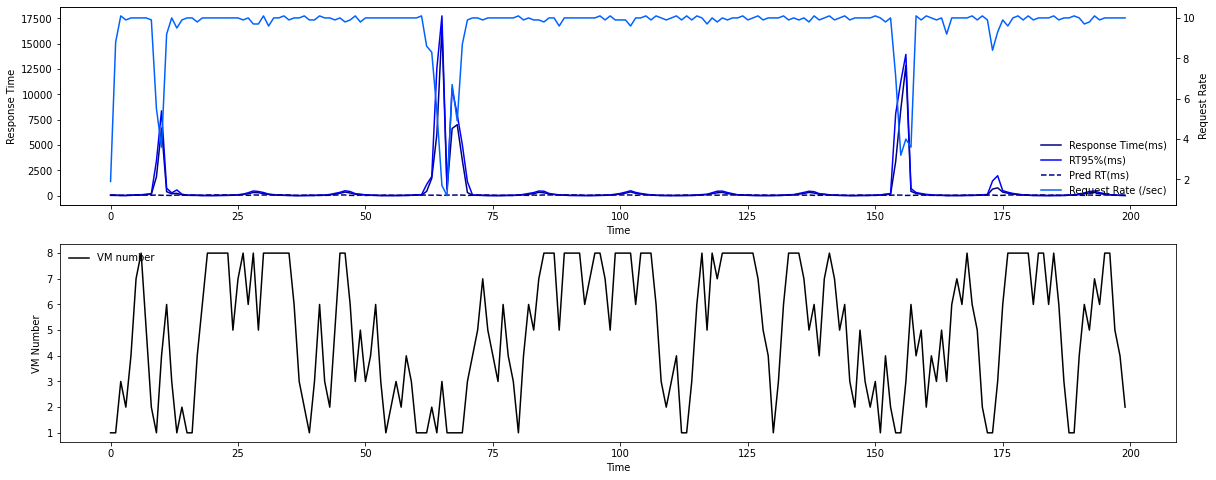

In [48]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_wm, 10, 'wn')

plot_pred(pred_rt_nn_with_wm)

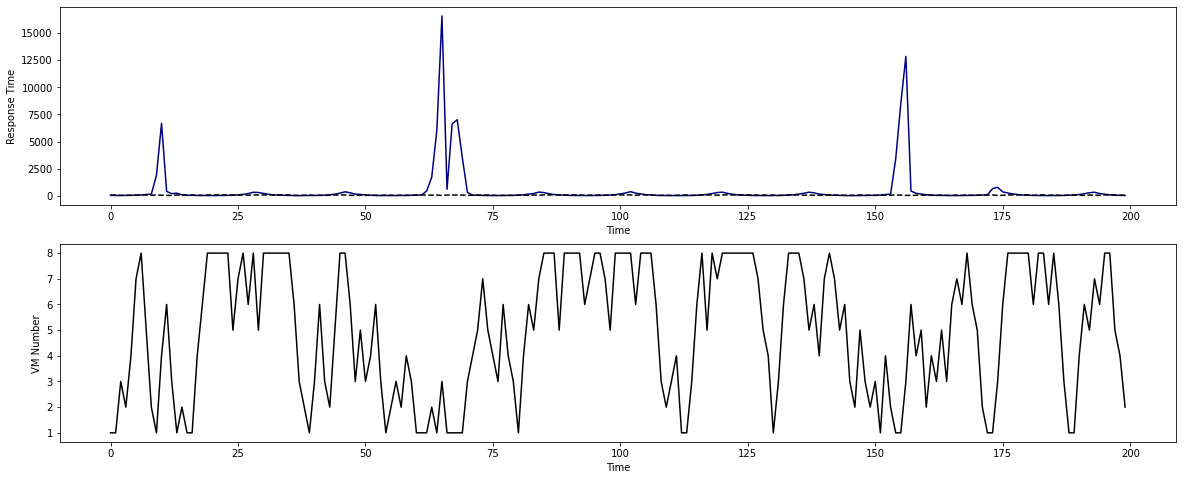

In [49]:
plot_pred_short(train_labels.values, pred_rt_nn_with_wm)

# Oké

## Mi látszik?

A lehető legjobb dolog.

Hogy csupán a **'worker_number'** alapján egyáltalán, semennyire nem lehet megmondani, hogy mi lesz a válaszidő.

Ez nagyon jó.

Végre van egy use-case amikor se a **'request_rate'**, se a **'worker_number'** alapján nem lehet becsülni a válasziőt.

## Nézzük meg ugyan ezt csak a CPU0User esetében

-------------------------------
train_feautues.shape (200, 1)
-------------------------------
-------------------------------
[[27.51]]
First example: [[9.2]]
Normalized   : [[-0.69]]
-------------------------------


Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-31 15:23:00.144621: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:23:38.048884: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:24:00.172003: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


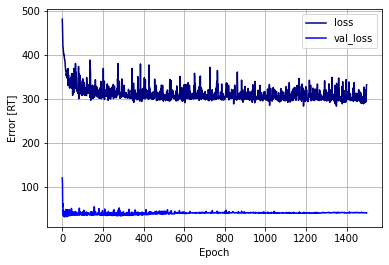

In [50]:


# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()


# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['CPU0User%']

train_features = df[input_variables]
train_labels = df[['response_time']]

print('-------------------------------')
print('train_feautues.shape', train_features.shape)
print('-------------------------------')

normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_cpu = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

# first_model_cpu.summary()

first_model_cpu.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_cpu = first_model_cpu.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_cpu)


(1000,) (1000, 1)


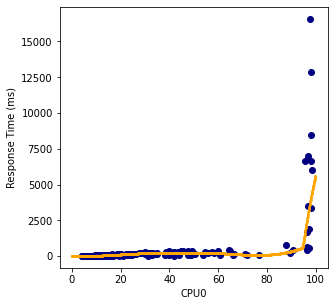

In [51]:
# egy oszlopos inputhoz
_x = np.arange(0, 100, 0.1)
__x = _x.reshape(-1, 1)
print(_x.shape, __x.shape)

# -
_pred_rt_by_x = first_model_cpu.predict(__x, verbose = 0)

plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['CPU0User%'], df['response_time'])
plt.plot(_x, _pred_rt_by_x, color='orange')
plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)
plt.xlabel('CPU0')
plt.ylabel('Response Time (ms)')
plt.show()

# Erre képes voltam találni egy olyan függvényt ami cpu -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.


7/7 [==============================] - 0s 3ms/step


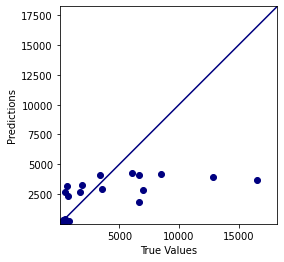

In [52]:
pred_rt_nn_with_cpu = np.squeeze(first_model_cpu.predict(train_features), 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_cpu)

In [53]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

In [54]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('viridis')
colors = [colormap(k) for k in np.linspace(0, 1, 4)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

slope 0.36 int 142.94
r2 0.62
r  0.79
mse 1668771.39


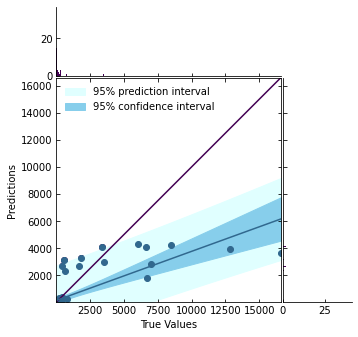

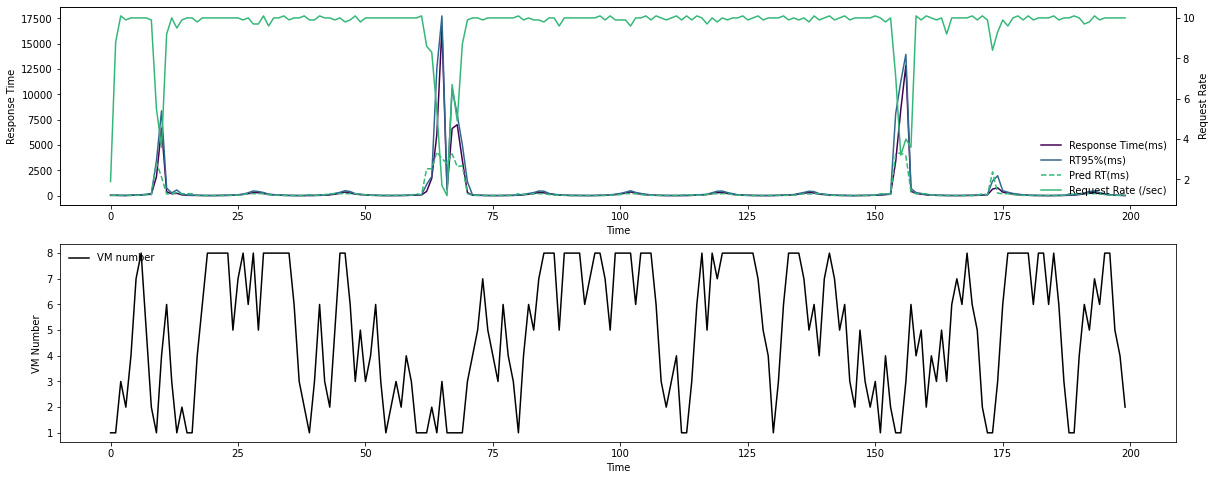

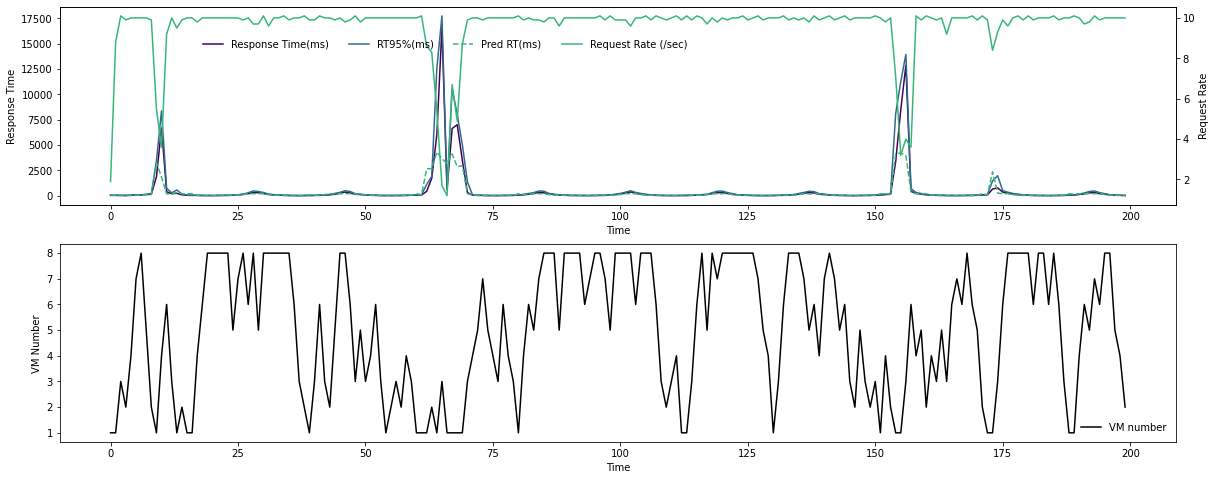

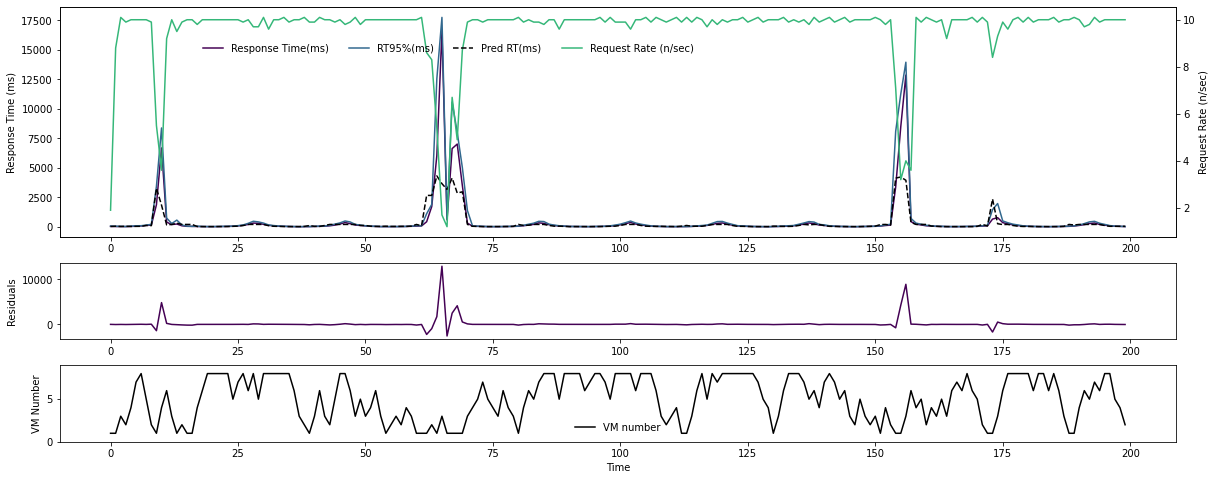

In [55]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_cpu, 10, 'cpu')

plot_pred(pred_rt_nn_with_cpu)

plot_pred_journal(pred_rt_nn_with_cpu)

plot_pred_with_res_journal(np.squeeze(train_labels.values), pred_rt_nn_with_cpu)

# Oké

## Mi látszik?

Megpróbáltam csinálni egy neurális hálót ahol csak a **'CPU0User%'** segítésgével próáltam becsülni a válaszidőt.

Ez önmaggában nem sikerült olyan jól. Miközben ezzel a neurális háló architekturúval szinte bármit meg lehetne tanulni.

---

Ennek a jelenségnek ugyan az az okat amit a **'request_rate'** esetében láttam. Hogy van a **'CPU0User%'** változóban egy olyan tartomány $\text{CPU0User} = 50 \pm 3$ ahová több **'request_rate'** is tartozik. (lásd a fenti ábra)

## Nézzük meg ugyan ezt a többi metrikával is

Előtte ki kell választani, hogy mi az aminek egyáltalán értleme van a Test esetében.

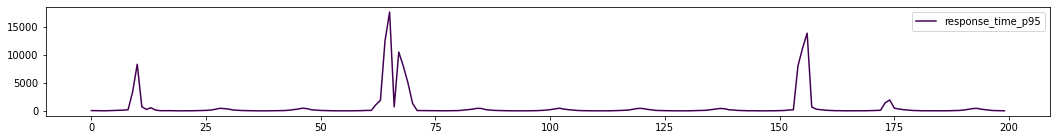

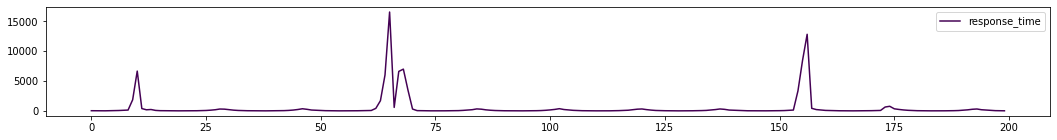

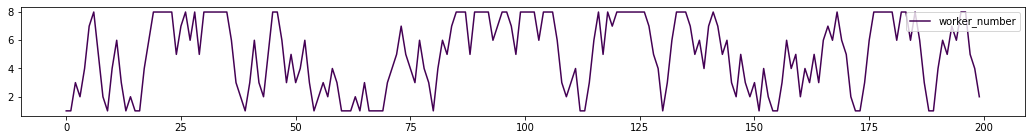

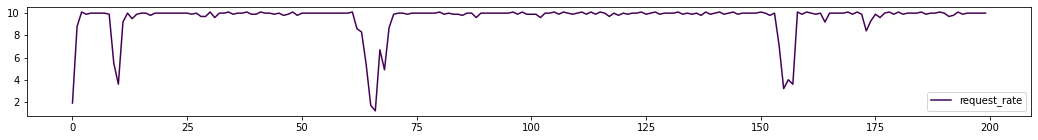

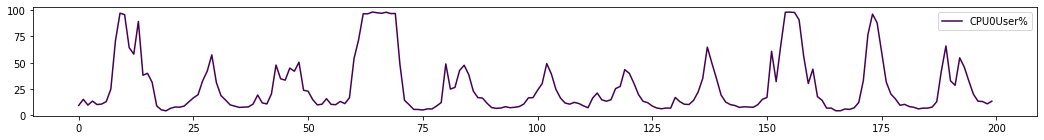

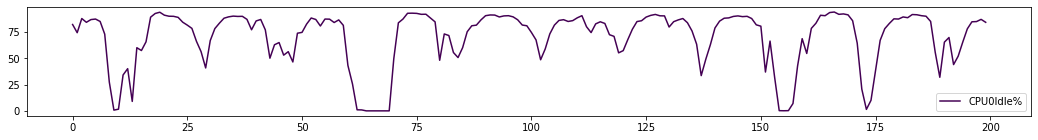

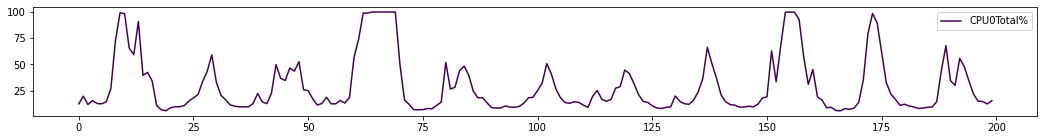

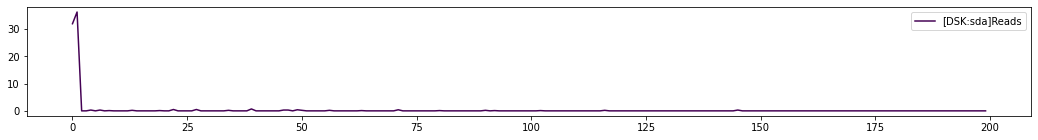

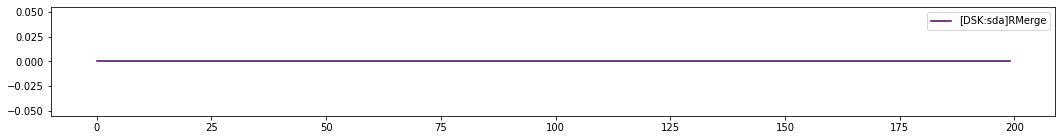

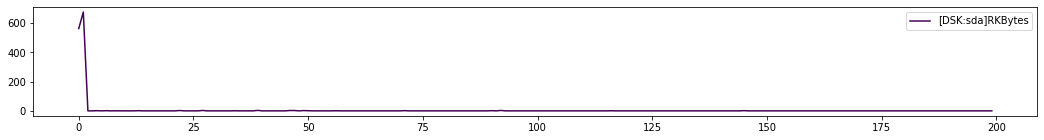

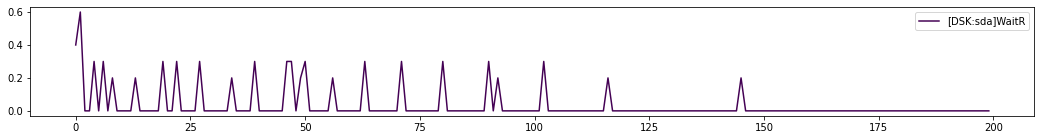

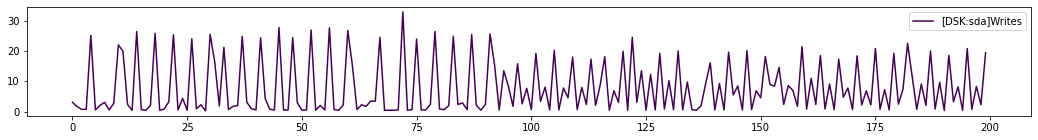

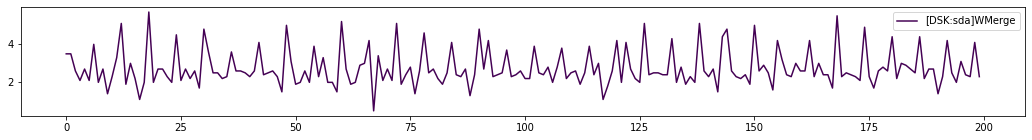

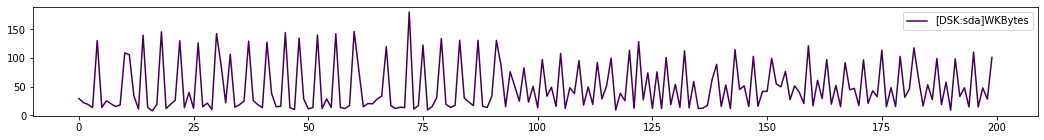

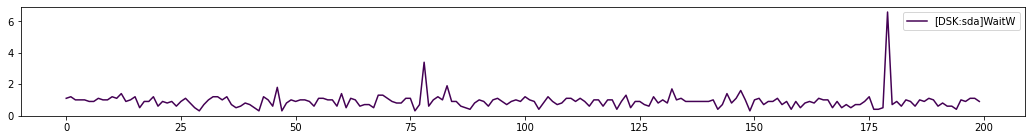

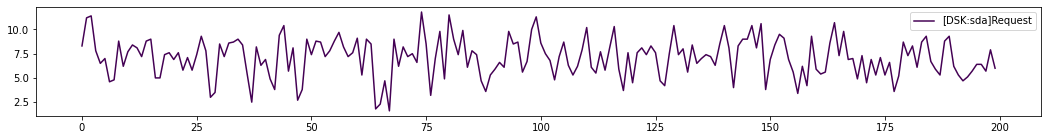

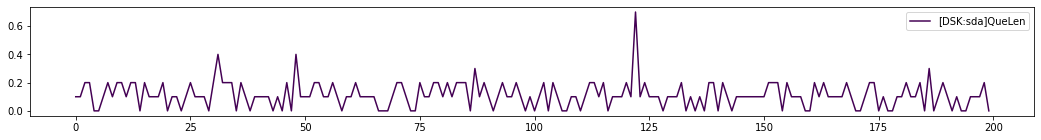

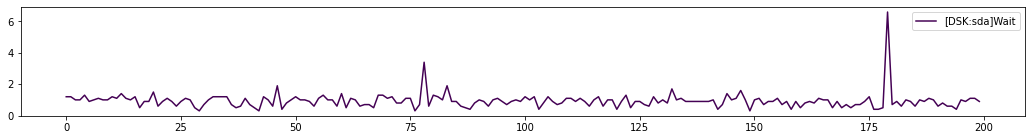

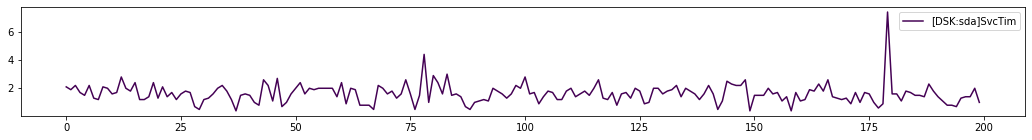

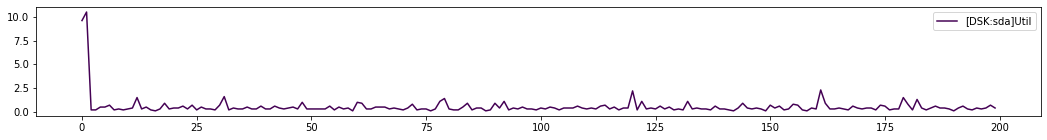

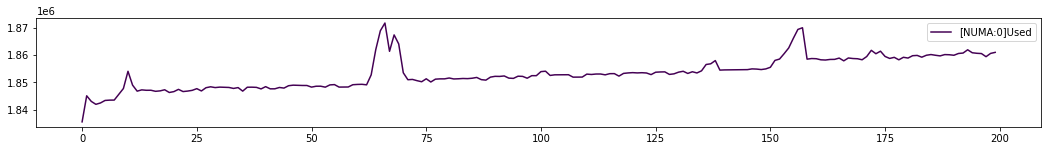

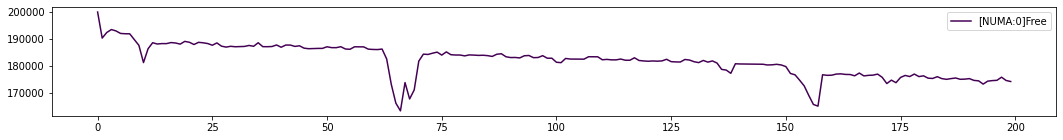

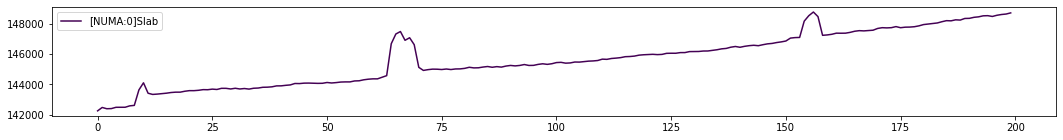

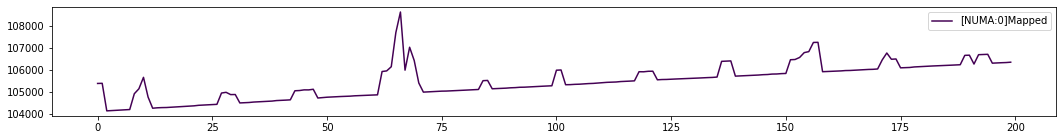

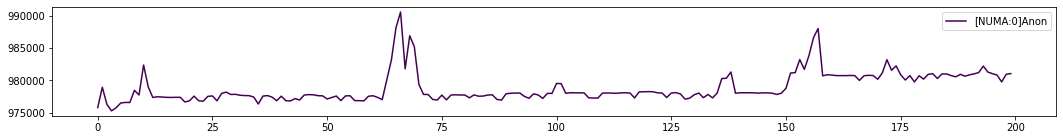

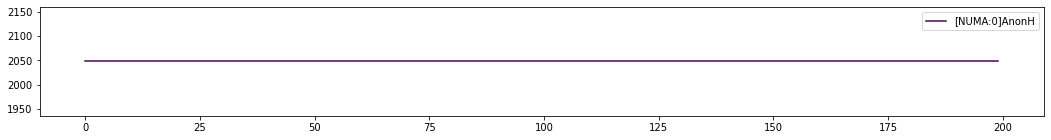

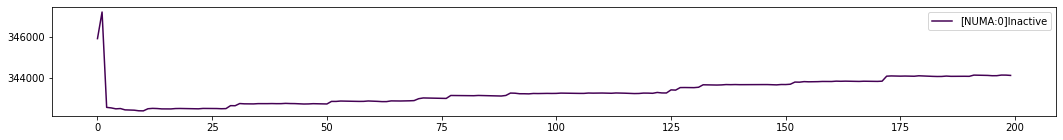

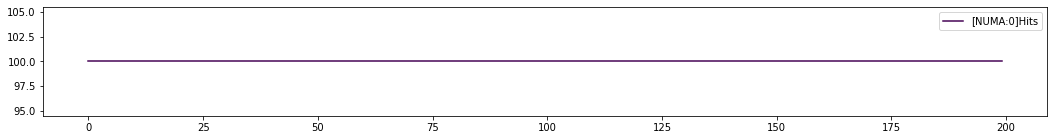

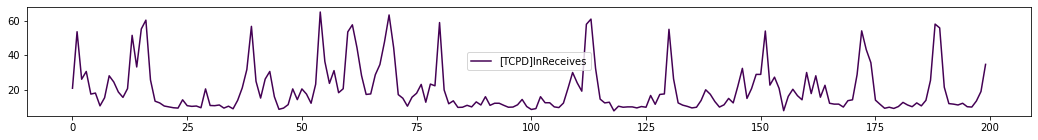

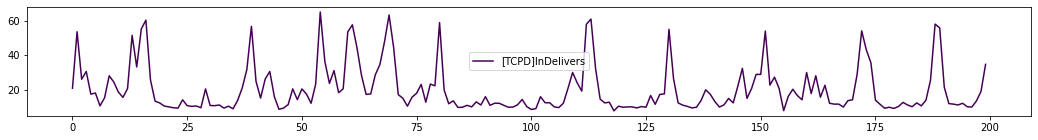

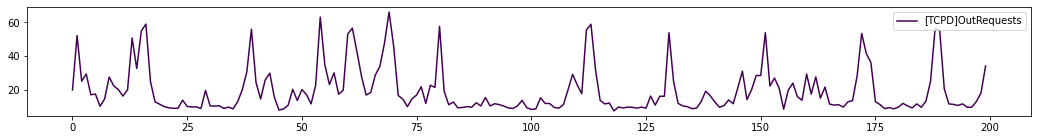

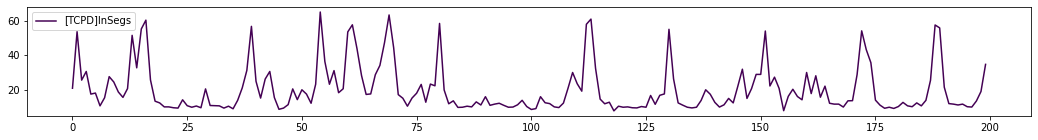

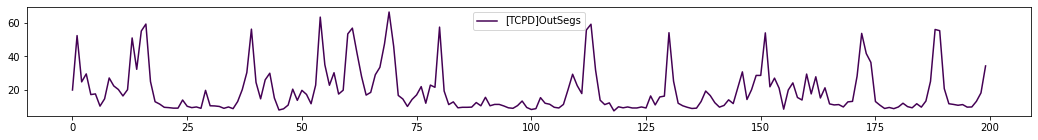

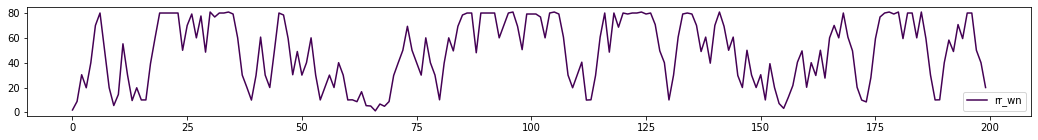

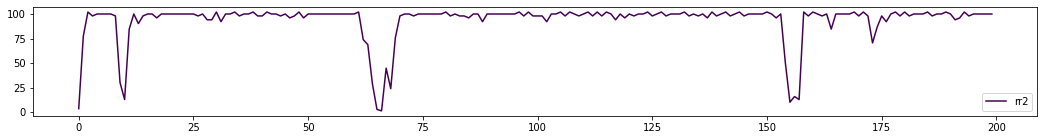

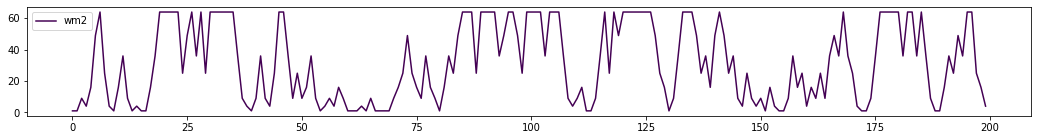

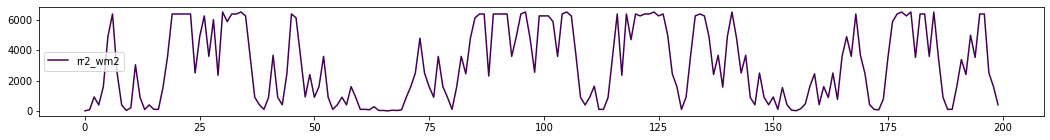

In [56]:
for _ in df.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(18, 2))
    plt.plot(df[_], label=_)
    plt.legend()
    plt.show()
    
    # [DSK:sda]WaitW
    # [DSK:sda]Request
    # [TCPD]InReceives
    

-------------------------------
train_feautues.shape (200, 4)
-------------------------------
-------------------------------
[[27.51  0.92  7.1  20.37]]
First example: [[ 9.2  1.1  8.3 20.9]]
Normalized   : [[-0.69  0.35  0.6   0.04]]
-------------------------------


Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-31 15:28:00.065419: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:28:00.114653: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:28:00.169745: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


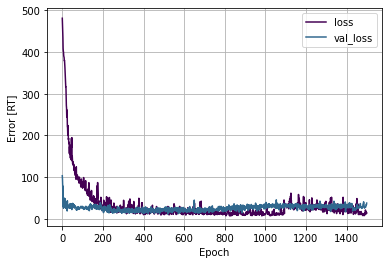

In [57]:


# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()


# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['CPU0User%', '[DSK:sda]WaitW', '[DSK:sda]Request', '[TCPD]InReceives']

    # [DSK:sda]WaitW
    # [DSK:sda]Request
    # [TCPD]InReceives

train_features = df[input_variables]
train_labels = df[['response_time']]

print('-------------------------------')
print('train_feautues.shape', train_features.shape)
print('-------------------------------')

normalizer = tf.keras.layers.Normalization(input_shape=(4,), axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_cddt = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

# first_model_cpu.summary()

first_model_cddt.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_cddt = first_model_cddt.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_cddt)


7/7 [==============================] - 0s 2ms/step


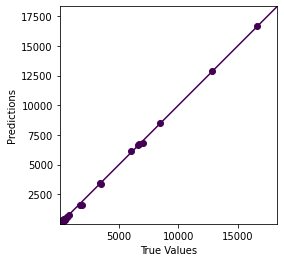

In [58]:
pred_rt_nn_with_cddt = np.squeeze(first_model_cddt.predict(train_features), 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_cddt)

slope 1.00 int -4.21
r2 1.00
r  1.00
mse 1165.91


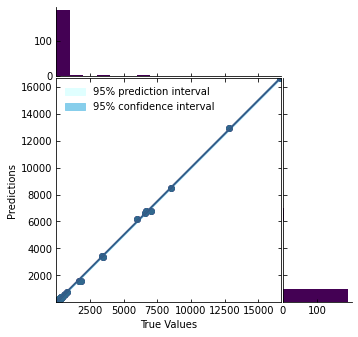

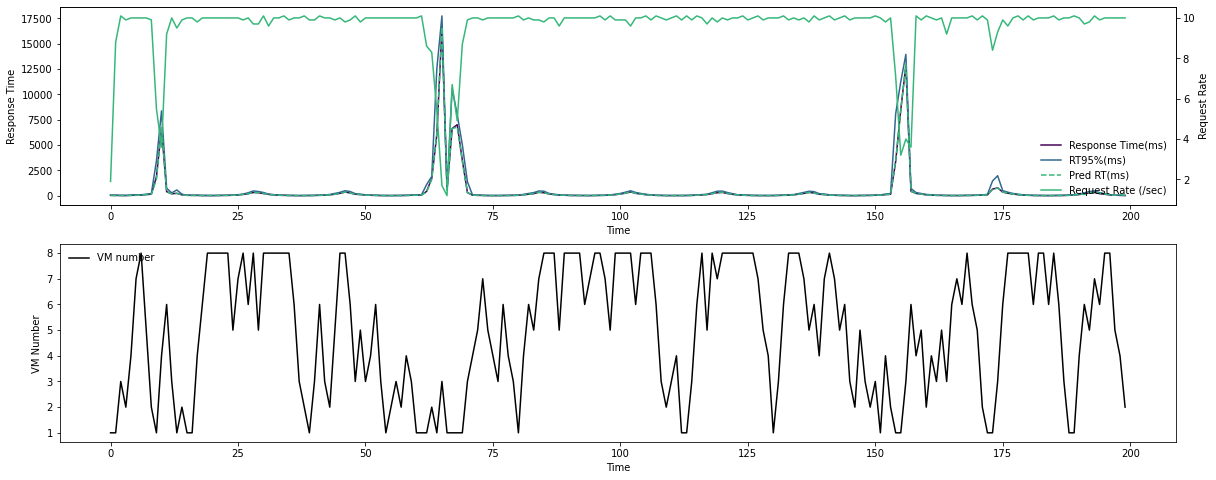

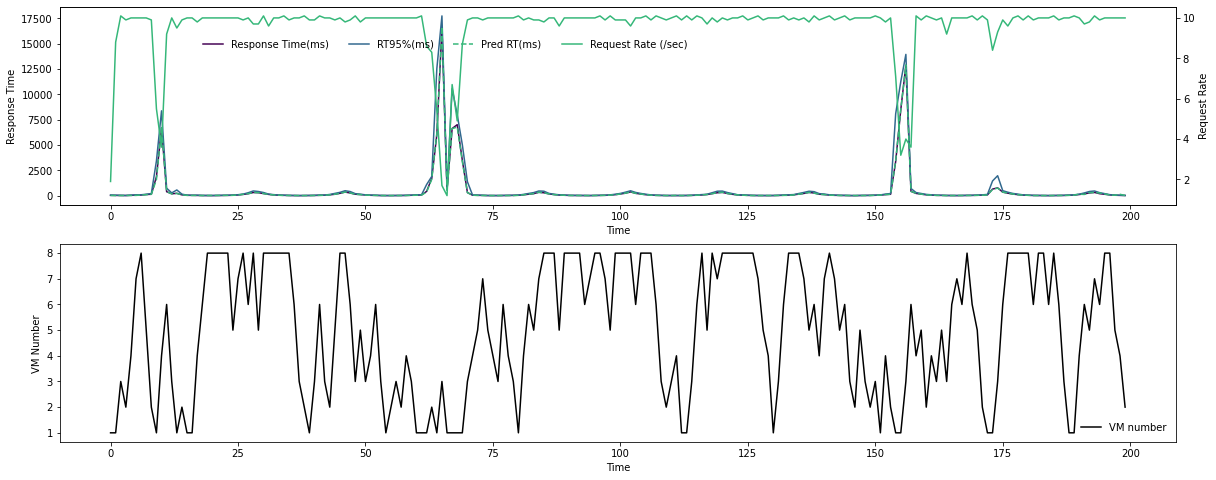

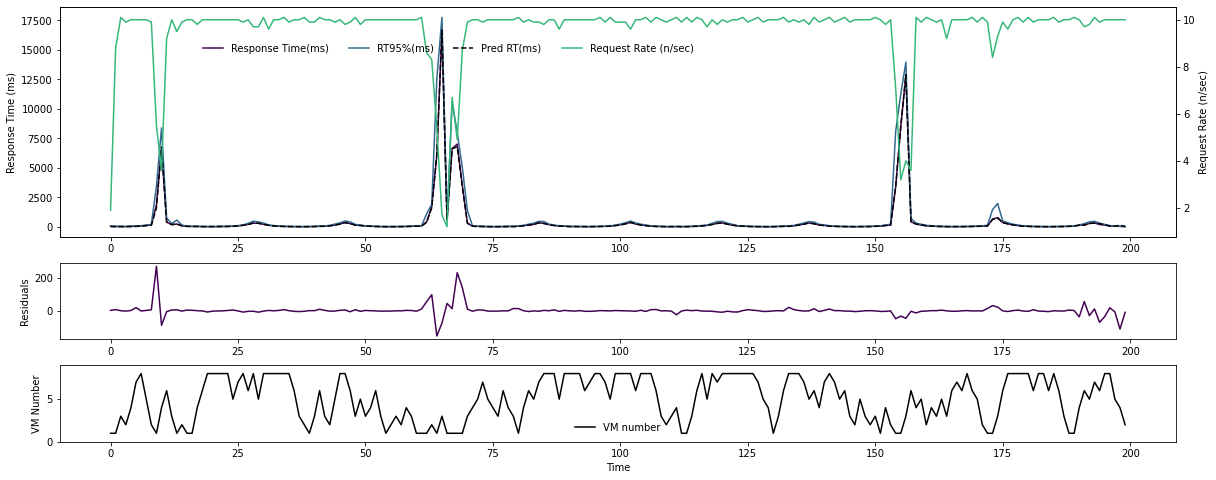

In [60]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_cddt, 1000, 'metrics')

plot_pred(pred_rt_nn_with_cddt)

plot_pred_journal(pred_rt_nn_with_cddt)

plot_pred_with_res_journal(np.squeeze(train_labels.values), pred_rt_nn_with_cddt)


<font color='red'>A cikkehez</font>

Kellene csinálni egy olyan ábrát is amin a három féle becslés (rr+wk, cpu, cpu+többi) együtt van rajta,
és fölöttük szerepel a három becslés által alatt pred_vs_true scatter plot is.

In [61]:
# mim van amiből ezt meg lehet csinálni

# pred_rt_nn_with_rr
# pred_rt_nn_with_wm
# pred_rt_nn_with_cpu
# pred_rt_nn_with_cddt

In [62]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('viridis')
colors = [colormap(k) for k in np.linspace(0, 1, 12)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

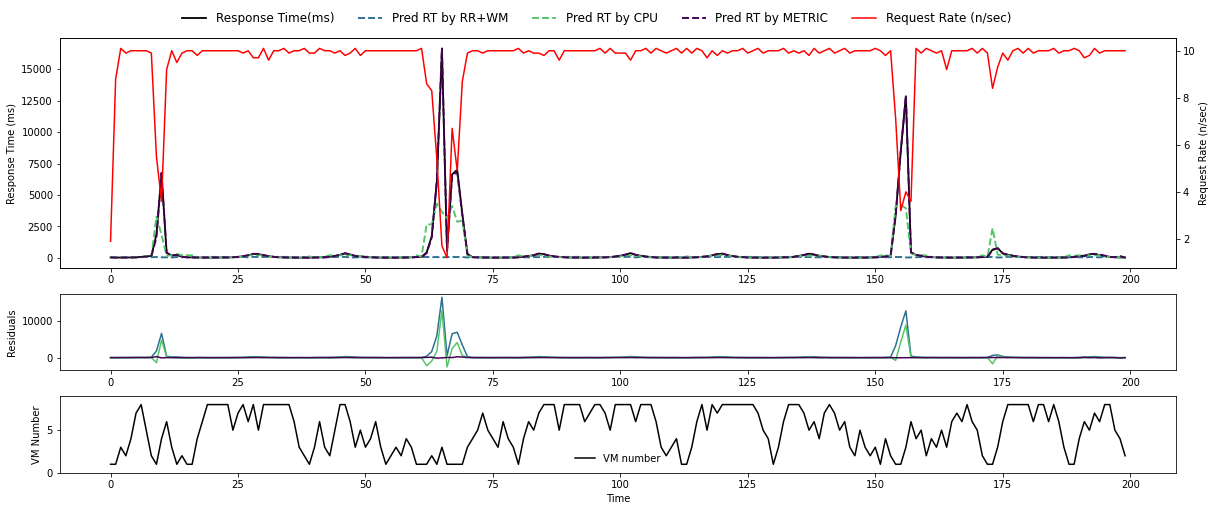

In [63]:
fig, (ax1, ax0, ax3) = plt.subplots(3,
                                    1,
                                    figsize=(20, 8),
                                    gridspec_kw={'height_ratios': [3, 1, 1]})

l1 = ax1.plot(df['response_time'],
              color='black',
              lw=1.8,
              label='Response Time(ms)')
# l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')

mlw = 1.9

l31 = ax1.plot(pred_rt_nn_with_wm,
               color='C4',
               lw=mlw,
               ls='--',
               label='Pred RT by RR+WM')
l32 = ax1.plot(pred_rt_nn_with_cpu,
               color='C8',
               lw=mlw,
               ls='--',
               label='Pred RT by CPU')
l33 = ax1.plot(pred_rt_nn_with_cddt,
               color='C12',
               lw=mlw,
               ls='--',
               label='Pred RT by METRIC')

ax2 = ax1.twinx()

l4 = ax2.plot(df['request_rate'], color='red', label='Request Rate (n/sec)')

# ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time (ms)')
ax2.set_ylabel('Request Rate (n/sec)')

_residuals1 = train_labels.values.flatten() - pred_rt_nn_with_wm
_residuals2 = train_labels.values.flatten() - pred_rt_nn_with_cpu
_residuals3 = train_labels.values.flatten() - pred_rt_nn_with_cddt

ax0.plot(_residuals1, color='C4', label='Residuals for RR+WM')
ax0.plot(_residuals2, color='C8', label='Residuals for CPU')
ax0.plot(_residuals3, color='C12', label='Residuals for METRIC')

ax0.set_ylabel('Residuals')

ax3.plot(df['worker_number'], color='black', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.set_ylim((0, 9))
ax3.legend(loc=0, frameon=False)

lns = l1 + l31 + l32 + l33 + l4
labs = [l.get_label() for l in lns]
ax2.legend(lns,
           labs,
           # loc=2,
           loc='upper left',
           frameon=False,
           ncol=5,
           mode='extend',
           fontsize='12',
           bbox_to_anchor=(0.10, 0.1, 0.0, 1.06))

plt.show()

## Itt a vége annak a Plotnak amit a cikkbe szántam.

Ami ez után következik az már csak hab a tortán.

## Csak kiviből, mutatok egy jó trükköt.

Feltenítom ugyan ezt a modelt de a workerek számával **'worker_number'** kiegészítve.

És a 'CPU' becslést úgy fogok ábrázolni, hogy worker numberekenkét külön külön.

-------------------------------
[[ 4.99 27.51]]
First example: [[1.  9.2]]
Normalized   : [[-1.58 -0.69]]
-------------------------------


Training:   0%|           0/150 ETA: ?s,  ?epochs/s

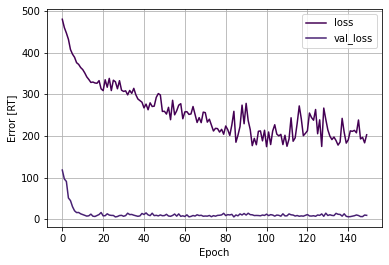

In [64]:


# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()


# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['worker_number',
                   'CPU0User%']

train_features = df[input_variables]
train_labels = df[['response_time']]

# Itt el lehet csúszni, ha nem állítom át az input_shape-t
# normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer = tf.keras.layers.Normalization(input_shape=[2,], axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_cpu_wm = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model_cpu_wm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_cpu_wm = first_model_cpu_wm.fit(
    train_features,
    train_labels,
    epochs = 150,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_cpu_wm)


#-------------------------------
#[[ 4.94 22.25]]
#First example: [[1.  9.8]]
#Normalized   : [[-1.44 -0.77]]
#-------------------------------


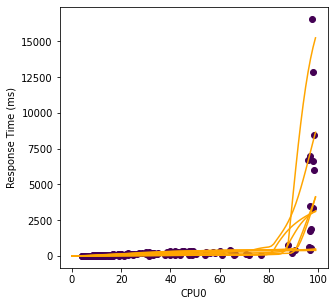

In [65]:
plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['CPU0User%'], df['response_time'])

# cpu [0-100]
_x = np.arange(0, 100, 1)
_x0 = _x.reshape(-1, 1)

# wm_numbert kell beleraknom
for _wn in range(0, 10):
    _x1 = _x0
    _x2 = np.full(_x1.shape, _wn)
    x12 = np.hstack((_x2, _x0)) # worker_number és cpu
    
    _pred_rt_by_x = first_model_cpu_wm.predict(x12, verbose = 0)

    plt.plot(_x, _pred_rt_by_x, color='orange')
    # plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)

plt.xlabel('CPU0')
plt.ylabel('Response Time (ms)')
plt.show()

# Erre képes voltam találni egy olyan függvényt ami cpu -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.


7/7 [==============================] - 0s 2ms/step


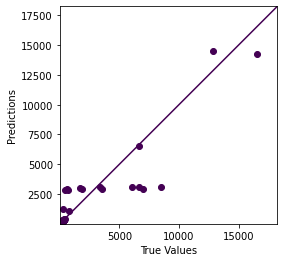

In [66]:
pred_rt_nn_with_cpu_wm = np.squeeze(first_model_cpu_wm.predict(train_features), 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_cpu_wm)

slope 0.81 int 47.48
r2 0.86
r  0.93
mse 482066.27


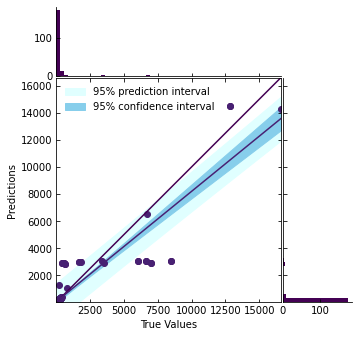

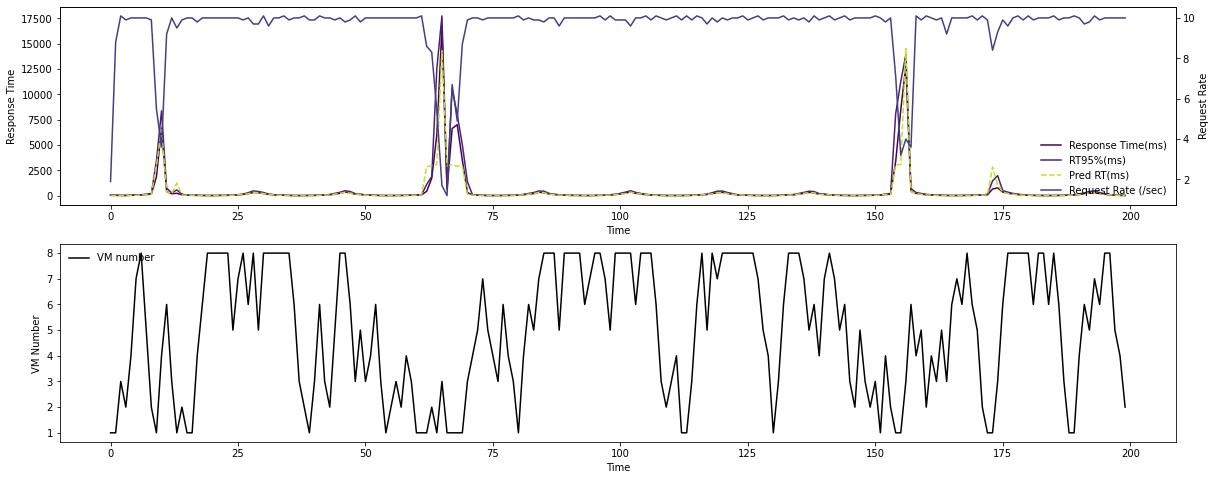

In [67]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_cpu_wm, 300)

plot_pred(pred_rt_nn_with_cpu_wm)

# Oké

## Mi látszik?

Megpróbáltam csinálni egy neurális hálót ahol csak a **'CPU0User%'** és a nem kategóriázált **'worker_number'** segítésgével próáltam becsülni a válaszidőt.

Ebben az esetben ez rendkívűl jól sikerült. Bár az is igaz, hogy ezzel a Neurálsi Hálóval szinte bármit meg lehet tanulni.

---

Amit plusztban szerettem volna megcsinálni, hogy **'worker_number'** értékenként külön külön ábrázolom a becslést a **'CPU0User%'** függvényében.

Ez sem sikerült olyan jól, mert ahogy látom a **'worker_number'** nem differenciál olyan jól mint gondoltam.

---

A következő kisérletben ugyan ezt fogom megnézni csak a **'CPU0User%'** helyett a **'request_rate'** változót fogom megnézni.

-------------------------------
[[4.99 9.57]]
First example: [[1.  1.9]]
Normalized   : [[-1.58 -5.17]]
-------------------------------


Training:   0%|           0/150 ETA: ?s,  ?epochs/s

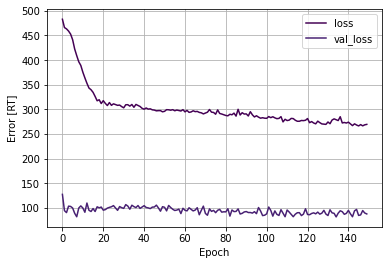

In [68]:


# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()


# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['worker_number',
                   'request_rate']

train_features = df[input_variables]
train_labels = df[['response_time']]

# Itt el lehet csúszni, ha nem állítom át az input_shape-t
# normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer = tf.keras.layers.Normalization(input_shape=[2,], axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_rr_wm = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model_rr_wm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_rr_wm = first_model_rr_wm.fit(
    train_features,
    train_labels,
    epochs = 150,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_rr_wm)


#-------------------------------
#[[ 4.94 22.25]]
#First example: [[1.  9.8]]
#Normalized   : [[-1.44 -0.77]]
#-------------------------------


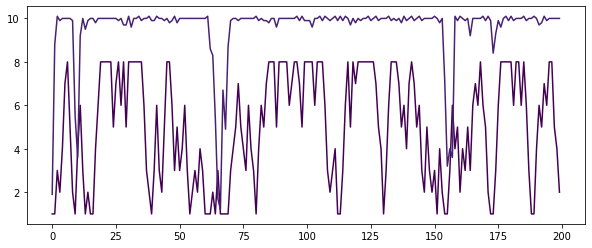

In [69]:
plt.figure(figsize=(10, 4))
plt.plot(train_features)
plt.show()

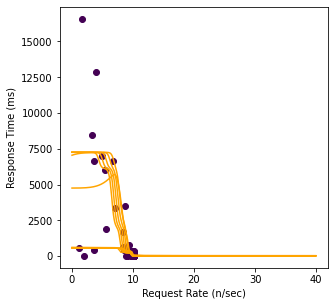

In [70]:
plt.figure(figsize=(4.8, 4.8))
plt.scatter(df['request_rate'], df['response_time'])

# request_rate [0-40]
_x = np.arange(0, 40, 0.1)
_x0 = _x.reshape(-1, 1)

# wm_numbert kell beleraknom
for _wn in range(0, 10):
    _x1 = _x0
    _x2 = np.full(_x1.shape, _wn)
    x12 = np.hstack((_x2, _x0)) # worker_number és request_rate
    
    _pred_rt_by_x = first_model_rr_wm.predict(x12, verbose = 0)

    plt.plot(_x, _pred_rt_by_x, color='orange')
    # plt.scatter(_x, _pred_rt_by_x, color='orange', s=2.5)

plt.xlabel('Request Rate (n/sec)')
plt.ylabel('Response Time (ms)')
plt.show()

# Erre képes voltam találni egy olyan függvényt ami cpu -ből csinál -> rt-t.

# Ha ez nem overfitting akkor semmi.


7/7 [==============================] - 0s 2ms/step


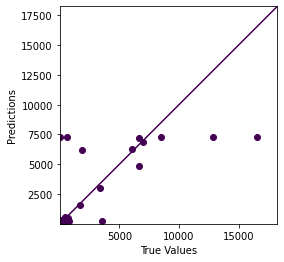

In [71]:
pred_rt_nn_with_rr_wm = np.squeeze(first_model_rr_wm.predict(train_features), 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_rr_wm)

slope 0.64 int 130.40
r2 0.63
r  0.79
mse 1257644.87


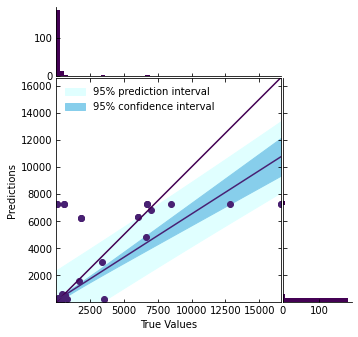

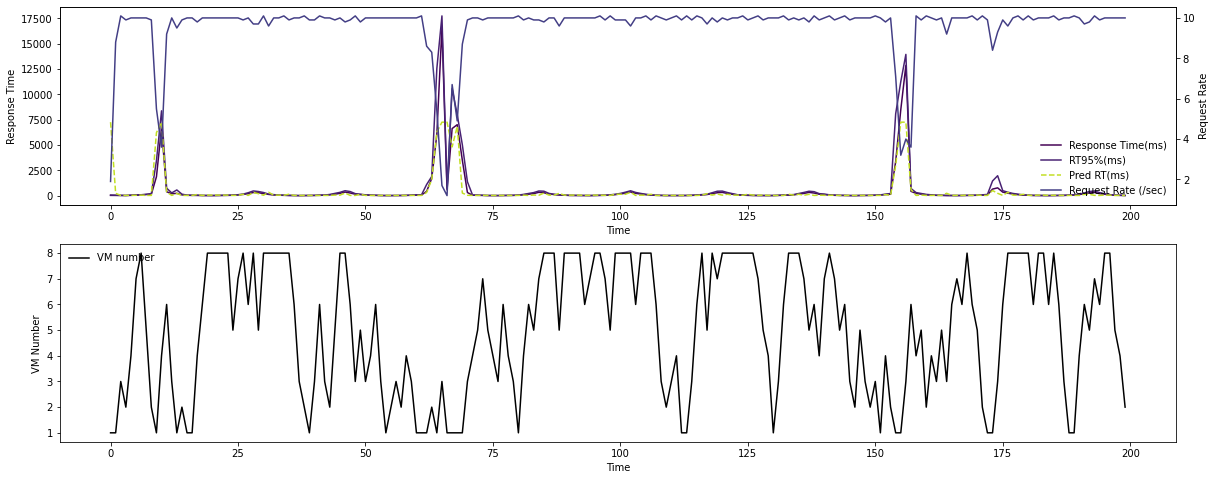

In [72]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_rr_wm, 300)

plot_pred(pred_rt_nn_with_rr_wm)

# Oké

## Mi látszik?

Megpróbáltam csinálni egy neurális hálót ahol csak a **'request_rate'** és a nem kategóriázált **'worker_number'** segítésgével próáltam becsülni a válaszidőt.

Ebben a példában ez gyakorlatilag képtelenség mivel a **'request_rate'** értéke végig konstans és az illesztés mérétkén is látszik, hogy ez nem sikerült. Ebben az esetben ez jó hír mert pontosan ezt akartam elérni, hogy legyen egy tesztem ahol a válaszidő teljesen független a bejövő kérések számától.

---

Nem szabad elfelejteni, hogy az így levont konklúzió csak erre az egy típusú **Train22** feladatra igaz.

## Egyszerűsített Neurális Háló

Amit most szeretnék elvégezni, hogy egy sokkal egyszerűbb neurális háló architektúrával megcsinálom ugyan ezeket a méréseket úgy is hogy beveszem a metrikákat.

Tehát ami itt összehasonlításra kerüla az a **'request_rate'** és **'worker_number'** model és ugyan ez kiegészítve a **'metrikákkal'**.


In [73]:
# [DSK:sda]Reads
# [TCPD]InReceives

input_variables = ['CPU0User%', '[DSK:sda]WaitW', '[DSK:sda]Request', '[TCPD]InReceives']

# Ezzel a kettővel fogom kiegészíteni a többit hagyom

-------------------------------
[[27.51  0.92  7.1  20.37]]
First example: [[ 9.2  1.1  8.3 20.9]]
Normalized   : [[-0.69  0.35  0.6   0.04]]
-------------------------------


Training:   0%|           0/150 ETA: ?s,  ?epochs/s

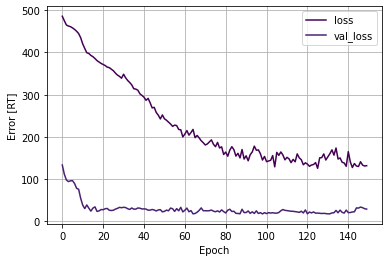

In [74]:


# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()



# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['CPU0User%', '[DSK:sda]WaitW', '[DSK:sda]Request', '[TCPD]InReceives']


train_features = df[input_variables]
train_labels = df[['response_time']]

# Itt el lehet csúszni, ha nem állítom át az input_shape-t
# normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer = tf.keras.layers.Normalization(input_shape=[4,], axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_rr_wm_met1 = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    layers.Dense(units=1)
])

first_model_rr_wm_met1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_rr_wm_met1 = first_model_rr_wm_met1.fit(
    train_features,
    train_labels,
    epochs = 150,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_rr_wm_met1)


#-------------------------------
#[[ 4.94 22.25]]
#First example: [[1.  9.8]]
#Normalized   : [[-1.44 -0.77]]
#-------------------------------


7/7 [==============================] - 0s 2ms/step


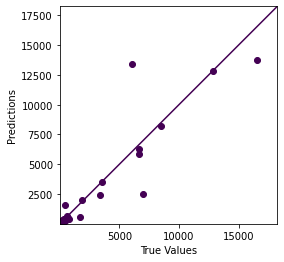

In [75]:
pred_rt_nn_with_rr_wm_met1 = np.squeeze(first_model_rr_wm_met1.predict(train_features), 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_rr_wm_met1)

slope 0.93 int 13.41
r2 0.87
r  0.93
mse 438579.13


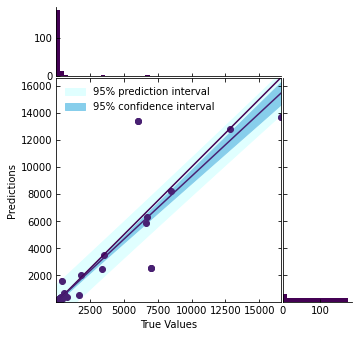

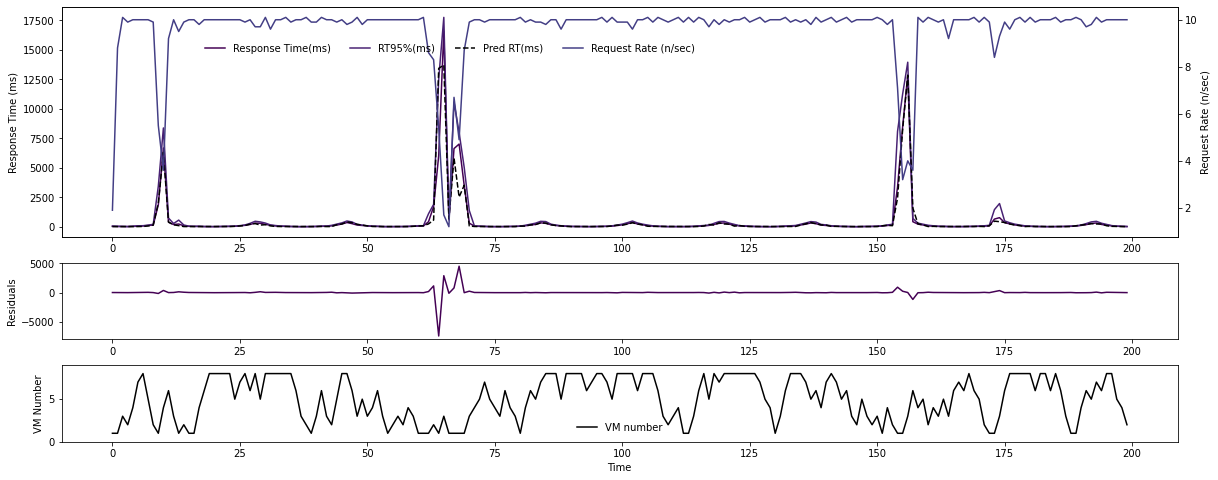

In [76]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_rr_wm_met1, 300)

plot_pred_with_res_journal(np.squeeze(train_labels.values), pred_rt_nn_with_rr_wm_met1)

## Oké

### Mit látok?

Hogy a metrikákkla kiegészítve az egyszerűbb háló is jó becslést ad míg a **'worker_number'** és **'request_rate'** képtelen lenne bármit is becsültni.

    input_variables = ['CPU0User%', '[DSK:sda]WaitW', '[DSK:sda]Request', '[TCPD]InReceives']



## Ismételt tanítás hosszabb tanítással

-------------------------------
[[27.51  0.92  7.1  20.37]]
First example: [[ 9.2  1.1  8.3 20.9]]
Normalized   : [[-0.69  0.35  0.6   0.04]]
-------------------------------


Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-31 15:33:44.753798: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:34:00.054063: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:34:00.096677: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:34:00.132016: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:34:00.167067: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 15:34:00.203823: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


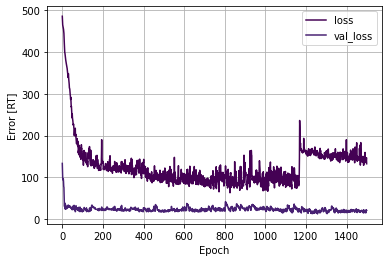

In [77]:


# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()



# train_features = inputs # 'request_rate' és 'woker_number' (kategóriára kódolva)

input_variables = ['CPU0User%', '[DSK:sda]WaitW', '[DSK:sda]Request', '[TCPD]InReceives']


train_features = df[input_variables]
train_labels = df[['response_time']]

# Itt el lehet csúszni, ha nem állítom át az input_shape-t
# normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer = tf.keras.layers.Normalization(input_shape=[4,], axis=-1)
normalizer.adapt(np.array(train_features))

print('-------------------------------')
with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())
print('-------------------------------')

first_model_rr_wm_met1 = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    layers.Dense(units=1)
])

first_model_rr_wm_met1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_rr_wm_met1 = first_model_rr_wm_met1.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

plot_loss(history_rr_wm_met1)


#-------------------------------
#[[ 4.94 22.25]]
#First example: [[1.  9.8]]
#Normalized   : [[-1.44 -0.77]]
#-------------------------------


7/7 [==============================] - 0s 2ms/step


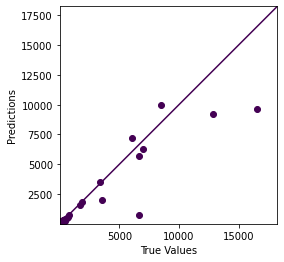

In [78]:
pred_rt_nn_with_rr_wm_met1 = np.squeeze(first_model_rr_wm_met1.predict(train_features), 1)

plot_true_vs_pred(train_labels.values, pred_rt_nn_with_rr_wm_met1)

slope 0.72 int 40.83
r2 0.88
r  0.94
mse 519503.79


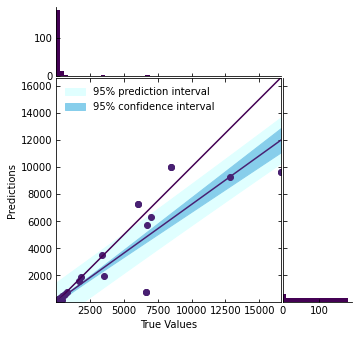

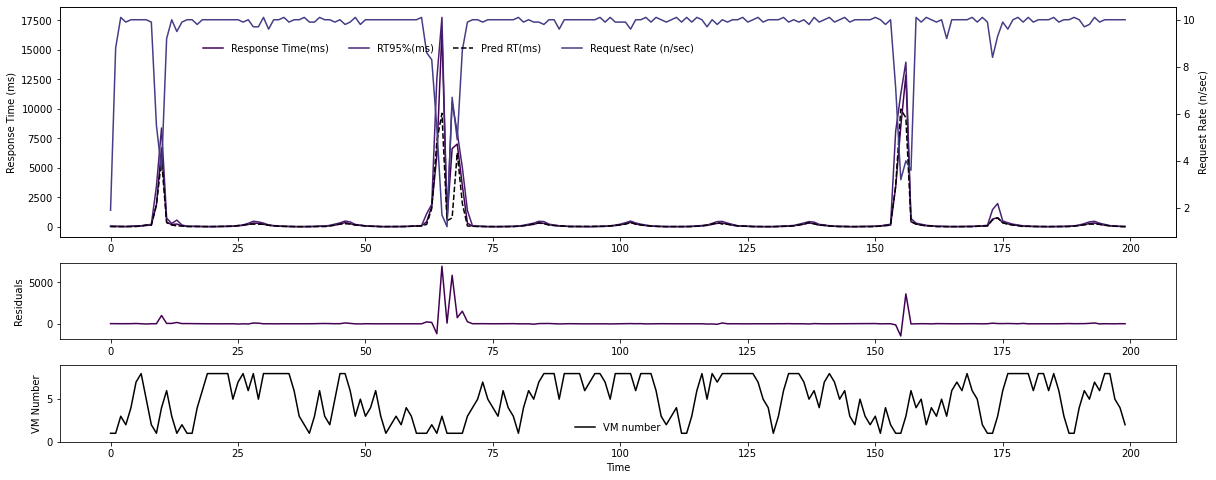

In [79]:
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_rt_nn_with_rr_wm_met1, 300)

plot_pred_with_res_journal(np.squeeze(train_labels.values), pred_rt_nn_with_rr_wm_met1)

## Oké

### Mit látok?

Az a meglátás, hogy az egyszerűbb modell esetnén (10, 5) (30, 15) helyett egy picivel rosszabb eredményt adott de még mindíg jó. (mse = 26.9, r2=0.96)


## Még egyszerűbb hálóval

In [80]:



# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()



FIRST_LAYER_NN = 7
SECOND_LAYER_NN = 4

EPOCHS = 150

input_variables = ['worker_number',
                   'request_rate']

train_features = df[input_variables]
train_labels = df[['response_time']]

# Itt el lehet csúszni, ha nem állítom át az input_shape-t
# normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer = tf.keras.layers.Normalization(input_shape=[2,], axis=-1)
normalizer.adapt(np.array(train_features))

second_model_rr_wm = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(FIRST_LAYER_NN, activation='tanh'),
    tf.keras.layers.Dense(SECOND_LAYER_NN, activation='ReLU'),
    layers.Dense(units=1)
])

second_model_rr_wm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_rr_wm = second_model_rr_wm.fit(
    train_features,
    train_labels,
    epochs = EPOCHS,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

Training:   0%|           0/150 ETA: ?s,  ?epochs/s

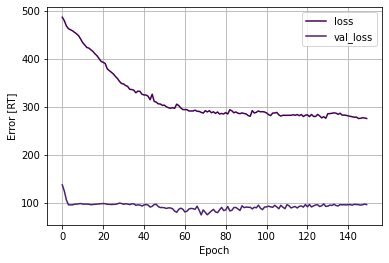

7/7 [==============================] - 0s 2ms/step


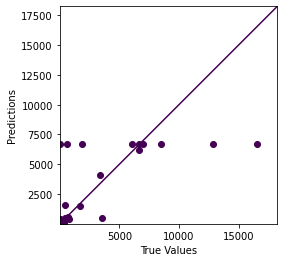

slope 0.62 int 146.88
r2 0.62
r  0.79
mse 1288437.94


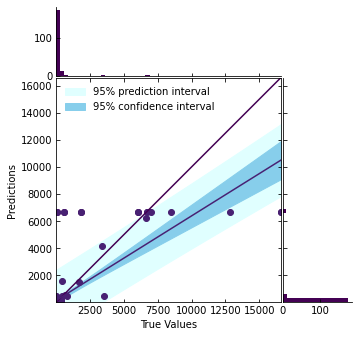

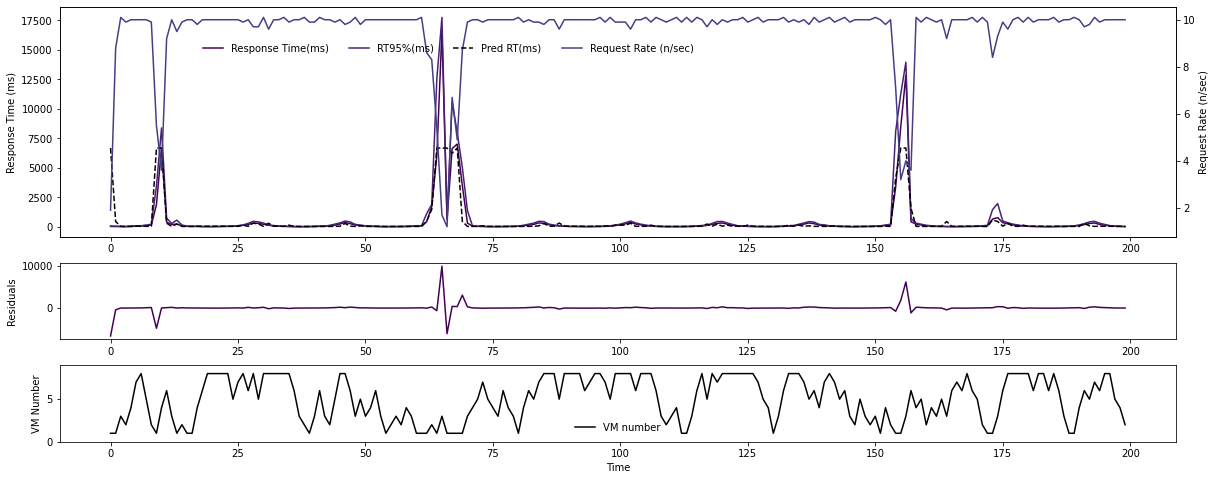

In [81]:
plot_loss(history_rr_wm)
plt.plot(train_features)
pred_s_rt_nn_with_rr_wm = np.squeeze(second_model_rr_wm.predict(train_features), 1)
plot_true_vs_pred(train_labels.values, pred_s_rt_nn_with_rr_wm)
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_s_rt_nn_with_rr_wm, 300)
plot_pred_with_res_journal(np.squeeze(train_labels.values), pred_s_rt_nn_with_rr_wm)

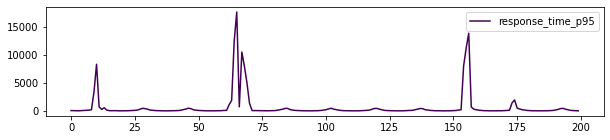

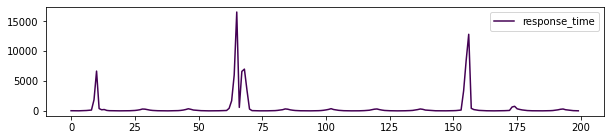

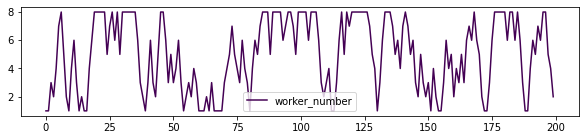

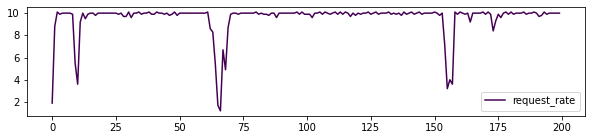

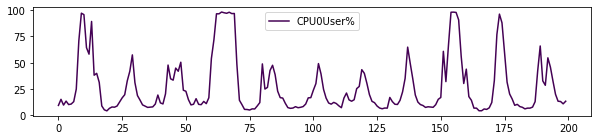

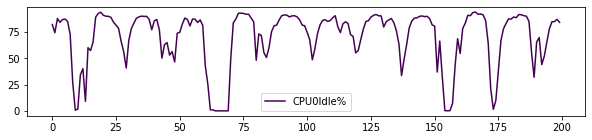

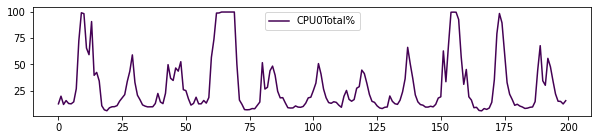

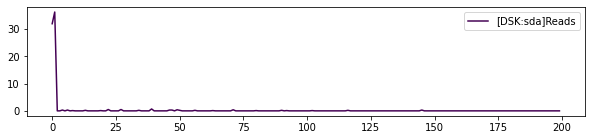

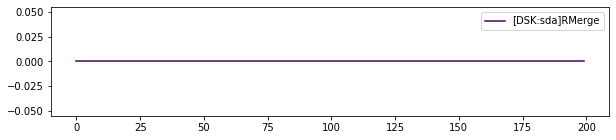

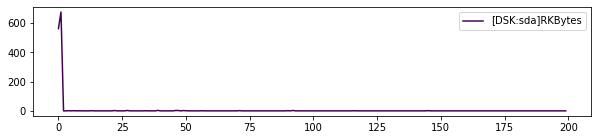

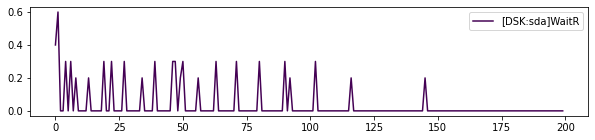

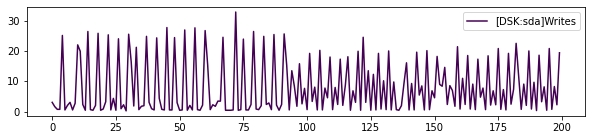

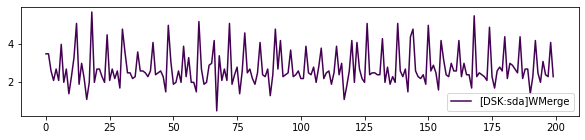

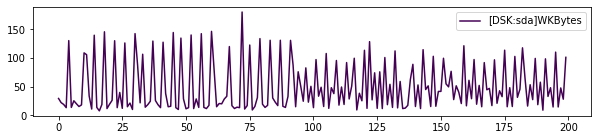

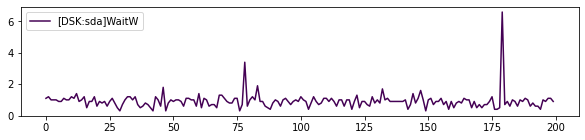

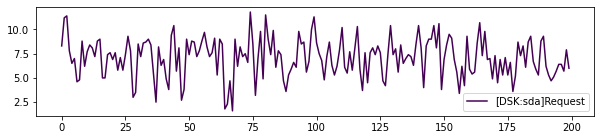

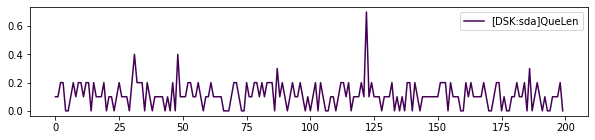

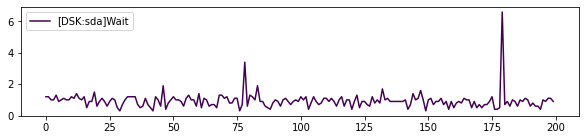

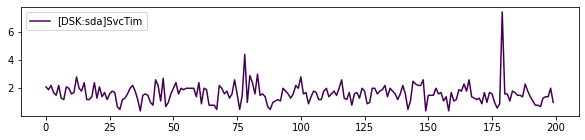

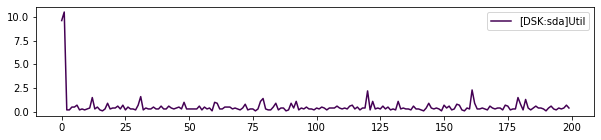

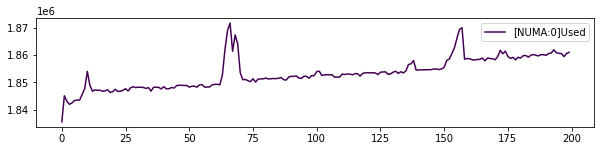

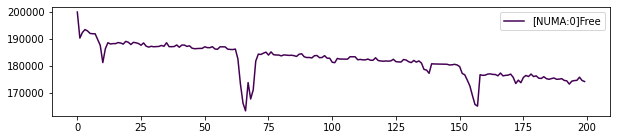

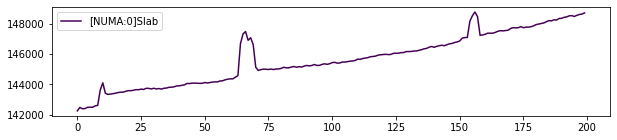

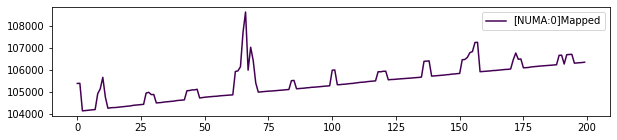

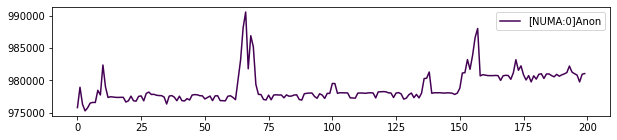

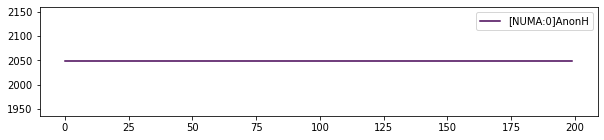

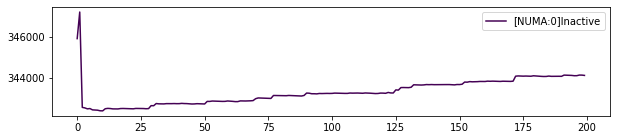

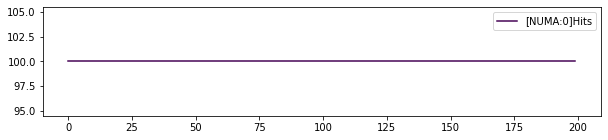

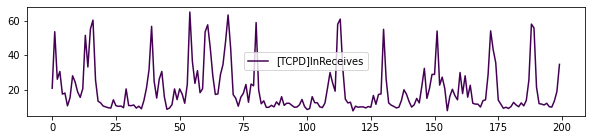

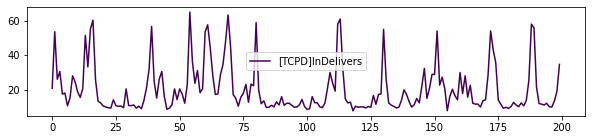

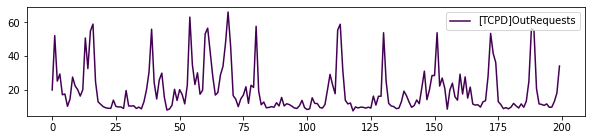

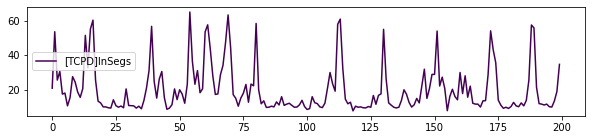

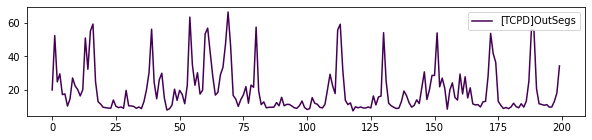

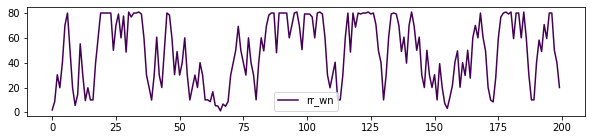

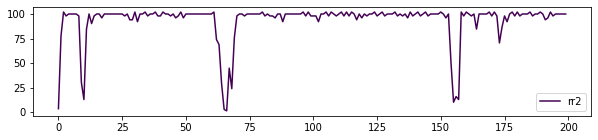

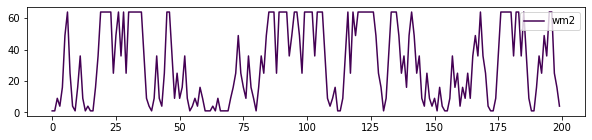

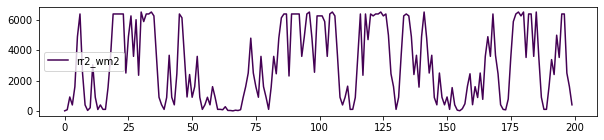

In [82]:
for _ in df.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(10, 2))
    plt.plot(df[_], label=_)
    plt.legend()
    plt.show()

In [85]:



# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()



FIRST_LAYER_NN = 7
SECOND_LAYER_NN = 4

EPOCHS = 1500

input_variables = ['CPU0User%', '[DSK:sda]WaitW', '[DSK:sda]Request', '[TCPD]InReceives']


train_features = df[input_variables]
train_labels = df[['response_time']]

# Itt el lehet csúszni, ha nem állítom át az input_shape-t
# normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=-1)
normalizer = tf.keras.layers.Normalization(input_shape=[4,], axis=-1)
normalizer.adapt(np.array(train_features))

second_model_rr_wm_met1 = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(FIRST_LAYER_NN, activation='tanh'),
    tf.keras.layers.Dense(SECOND_LAYER_NN, activation='ReLU'),
    layers.Dense(units=1)
])

second_model_rr_wm_met1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history_rr_wm_met1 = second_model_rr_wm_met1.fit(
    train_features,
    train_labels,
    epochs = EPOCHS,
    # batch_size = 300,
    verbose = 0,
    callbacks=[tqdm_callback],
    validation_split = 0.05)

Training:   0%|           0/1500 ETA: ?s,  ?epochs/s

2023-05-31 21:06:00.091963: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-31 21:06:00.150770: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


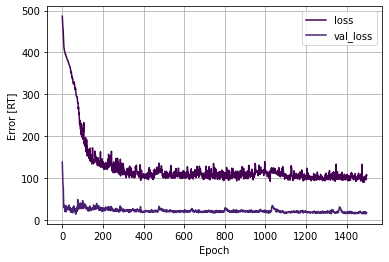

7/7 [==============================] - 0s 2ms/step


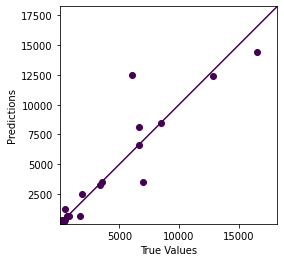

slope 0.97 int 20.93
r2 0.91
r  0.95
mse 315898.69


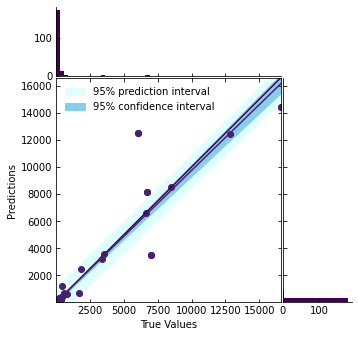

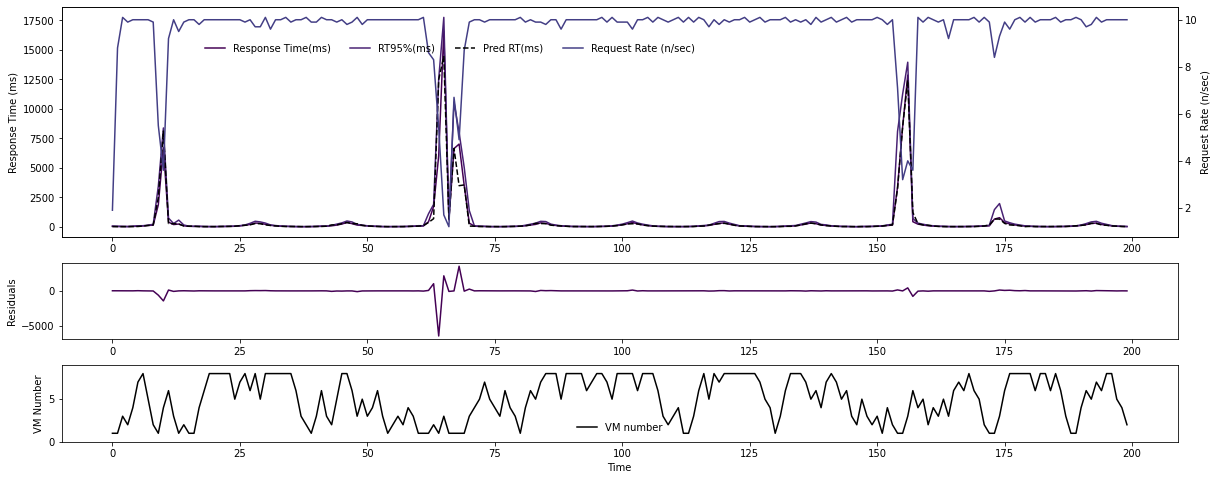

In [86]:
plot_loss(history_rr_wm_met1)
plt.plot(train_features)
pred_s_rt_nn_with_rr_wm_met1 = np.squeeze(second_model_rr_wm_met1.predict(train_features), 1)
plot_true_vs_pred(train_labels.values, pred_s_rt_nn_with_rr_wm_met1)
plot_true_vs_pred_hist_conf(np.squeeze(train_labels.values, 1), pred_s_rt_nn_with_rr_wm_met1, 300)
plot_pred_with_res_journal(np.squeeze(train_labels.values), pred_s_rt_nn_with_rr_wm_met1)

## Oké

## Meg vagyok elégedve

Azt látom hogy egy viszonylag egyszerű modell NN(7,4) esetében is ha elég sokáig tanítom akkor is elég pontos becslést ad a metrikák alapján a válaszidőre.

---

A **'worker_number'** és a **'request_rate'** alapján pedig egyáltalán nem lehetett becsülni.

---

Igaz ez a Test23 egy igazi rossz mérés - Arichive egyébként ki kell dobni.


## Input(RR)

Na tehát akkor kísérleti jelleggel megcsinálom azt, hogy az $\hat{rt} = nn(\text{wn}, \text{rr})$

Minvel az $\text{rr}$ ismert a $\text{wn}$ pedig a kontrollált változó ezért a fenti képlet segítségével minden $\text{wn}$-re ki tudom számolni, hogy mi lenne a $\hat{rt} = nn(\text{wn}, \text{rr})$



In [87]:



# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()



input_variables = ['worker_number',
                   'request_rate']

train_features = df[input_variables]
train_labels = df[['response_time']]

# plot_loss(history_rr_wm)
# plt.plot(train_features)
pred_s_rt_nn_with_rr_wm = np.squeeze(second_model_rr_wm.predict(train_features), 1)

# Menjünk végig minden lehetséges vm számon [1, 10]
# és mindegyikre számoljuk ki hogy milyen válaszidőt mondott volna model

# Model rt = nn(worker_number, requrest_rate)

tmp = df[input_variables].copy()

hip = df.copy()

input_variables = ['hip_worker_number',
                   'request_rate']

for i in range(1, 10):
    tmp['hip_worker_number'] = i
    train_features = tmp[input_variables]
    pred = np.squeeze(second_model_rr_wm.predict(train_features), 1)
    col_name = 'pred_rt_wm' + str(i)
    hip[col_name] = pred


7/7 [==============================] - 0s 2ms/step


In [88]:
ff = ['pred_rt_wm7', 'pred_rt_wm8']
ff = [x for x in hip.columns if 'pred_rt_wm' in x]
fa = hip[ff]

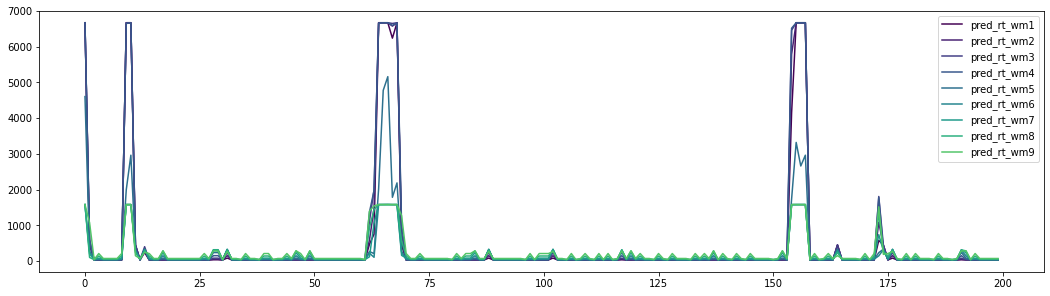

In [89]:
plt.figure(figsize=(18, 4.8))
for i, v in enumerate(fa):
    plt.plot(fa.iloc[:,i], label = str(v))
plt.legend()
plt.show()

## Mit látok

Azt, hogy a **'request_rate'** és a **'worker_number'** alpján feltanított neurális háló **képtelen megmondani**, hogy milyen **'worker_number'** számhoz milyen válaszidő tartozott volna ( ha a kisérlet során az lett volna a **'worker_number'**)

## Ez azt jelenti, hogy

Simán a bejövő kérések száma **'request_rate'** és a rendszerbe csatolt gépek száma **'worker_number'** alapján **nem tudnám** megmondani (tanítani a neurális hálónak) hogy mi lesz a várható válaszidő.

Az így feltanított modell alapján pedig simán meg lehet mondani, hogy adott bejövő kérések száma **'request_rate'** mi az a megfelelő **'worker_number'** amivel a válaszidőt a kívánt tartományba lehet szorítani.

## ?

Ez alapján elsőre azt is mondthatnám, hogy akkor az általam felállított model amely a belső metrikákra épül teljesen felesleges.

Azonban az a megérzés, intuicíió, hogy ez a fenti modell csak akkor működik amikor egy féle végpontot hívok, ezért a kérés szám és a válaszidő között kapcsolat és a workerek száma közötti kapcsolat mindíg állandó.

## Azonban képzeljük el, hogy mi van akkor amikor

Mondjuk kétféle végponot hivok.

Az egyik a wait ami mögött semmilyen számítás nincs a másik pedig egy cpu intenzív számítás mondjuk a fibo.

Az egyik esetben (wait) a bejövő kérések száma elvben nem fogja befolyásolni a válaszidőt. A másik esetben igen.

Ezt úgy lehet demonstrálni, hogy elöször 10 percig hívom csak a waitet, majd 10 percig csak a fibót.

Természetesen mindkettőt látta a tanulás során. De a ha csak a **'request_rate'** és a **'worker_number'** alapján tanítom ezt a modlet akkor ez elvileg nem lesz képes helyesen és pontosan megmondani, hogy mi lesz a válaszidő csak a fenti két változó alapján (mert ugye lesznek olyan rr-wm konstellációk amelyekhez különböző rt-k tartoznak (attól függően, hogy melyik végpontot hívtam meg))
Tehet egyfajta (x1, x2) intputhozt többféle y érték tartozik.

Ezért jó ha figyelembe veszük a belső metrikát is.

**Fontos:** hogy a fenti megállapítás csak akkor igaz, hogyha a fibo számítása nincs hatással a wait számítására (elvileg nincs) Tehát a wait akkor is kiszolgálásra kerül amikor a fibo már laggol mint az állat.

## A következő feladat erre irni egy JMeter tesztsort

    Amit itt írtam annak itt vége.
    
    A Test24 könyvtárban folytatom ahol már egy olyan testsorozatot hajtok végre ahol két REST hívás van.